# Contexte:


On va nettoyer et effectuer une analyse exploratoire sur une base de données anonymisée d'OLIST( Solution de vente sur les marketplaces en ligne) comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

<h1>Sommaire:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies-et-préparation-de-l'environnement-du-travail" data-toc-modified-id="Import-des-librairies-et-préparation-de-l'environnement-du-travail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies et préparation de l'environnement du travail</a></span></li><li><span><a href="#Import,-traitement-et-préparation-du-le-jeu-de-données" data-toc-modified-id="Import,-traitement-et-préparation-du-le-jeu-de-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import, traitement et préparation du le jeu de données</a></span><ul class="toc-item"><li><span><a href="#Import-du-jeu-de-données" data-toc-modified-id="Import-du-jeu-de-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import du jeu de données</a></span></li><li><span><a href="#Fusion-des-datasets" data-toc-modified-id="Fusion-des-datasets-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fusion des datasets</a></span></li><li><span><a href="#Création-des-variables" data-toc-modified-id="Création-des-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Création des variables</a></span></li></ul></li><li><span><a href="#Analyse-Exploratoire-du-dataset" data-toc-modified-id="Analyse-Exploratoire-du-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse Exploratoire du dataset</a></span><ul class="toc-item"><li><span><a href="#Analyse-univariée" data-toc-modified-id="Analyse-univariée-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analyse univariée</a></span><ul class="toc-item"><li><span><a href="#La-distribution-des-variables" data-toc-modified-id="La-distribution-des-variables-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>La distribution des variables</a></span></li></ul></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analyse bivariée</a></span><ul class="toc-item"><li><span><a href="#Les-Graphiques-à-deux-variables" data-toc-modified-id="Les-Graphiques-à-deux-variables-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Les Graphiques à deux variables</a></span></li><li><span><a href="#La-matrice-de-corrélation" data-toc-modified-id="La-matrice-de-corrélation-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>La matrice de corrélation</a></span></li></ul></li><li><span><a href="#Réduction-dimensionnelle" data-toc-modified-id="Réduction-dimensionnelle-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Réduction dimensionnelle</a></span><ul class="toc-item"><li><span><a href="#prétraitement-de-données" data-toc-modified-id="prétraitement-de-données-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>prétraitement de données</a></span></li><li><span><a href="#Analyse-des-Composantes-principales" data-toc-modified-id="Analyse-des-Composantes-principales-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Analyse des Composantes principales</a></span></li></ul></li></ul></li><li><span><a href="#Enregistrement-du-Nouveau-jeu-de-données-dans-un-fichier-csv" data-toc-modified-id="Enregistrement-du-Nouveau-jeu-de-données-dans-un-fichier-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Enregistrement du Nouveau jeu de données dans un fichier csv</a></span></li></ul></div>

## Import des librairies et préparation de l'environnement du travail

In [1]:
%load_ext pycodestyle_magic 

In [2]:
%pycodestyle_on

In [3]:
# pip install adjustText

In [4]:
# %%flake8  # checking PEP8 compliance
# Importing librairies

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import sklearn
from sklearn.decomposition import PCA
from urllib import request
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from adjustText import adjust_text
import re
import os
import zipfile
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_validate

InteractiveShell.ast_node_interactivity = "all"

In [5]:
import pkg_resources
import types


def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
        yield name


imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != "pip":
        requirements.append((m.project_name, m.version))
for r in requirements:
    print("La version utilisée de la laibririe:  {}=={}".format(*r))

La version utilisée de la laibririe:  seaborn==0.11.1
La version utilisée de la laibririe:  scikit-learn==0.22.2.post1
La version utilisée de la laibririe:  pandas==1.2.4
La version utilisée de la laibririe:  numpy==1.19.5
La version utilisée de la laibririe:  matplotlib==3.4.3


## Import, traitement et préparation du le jeu de données

### Import du jeu de données

In [6]:
# Importing files from a zip repository and
path = r"\Users\Utilisateur\Downloads\OLIST.zip"
# le chemin vers le répertoire zip des données
with zipfile.ZipFile(path, "r") as zfile:
    dfs = {name[:-4]: pd.read_csv(zfile.open(name))
           for name in zfile.namelist()}
    print(zfile.namelist())
    zfile.close()

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


In [7]:
# On va télécharger chaque fichier dans un dataframe Pandas
customers_dataset = dfs['olist_customers_dataset']
geolocation_dataset = dfs['olist_geolocation_dataset']
order_items = dfs['olist_order_items_dataset']
order_payments = dfs['olist_order_payments_dataset']
order_reviews = dfs['olist_order_reviews_dataset']
orders = dfs['olist_orders_dataset']
products = dfs['olist_products_dataset']
sellers = dfs['olist_sellers_dataset']
category_name = dfs['product_category_name_translation']

In [8]:
customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [9]:
geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


On remarque que les noms des colonnes commence par geolocation, on va la remplacer par customer juste pour l'unifier avec la première, sachant qu'on va aussi utiliser ses données pour le vendeur(seller)

In [10]:
A = list(geolocation_dataset.columns.values)
col_name = {elt: elt.replace("geolocation", "customer") for elt in A}
col_name
geolocation_dataset.rename(columns=col_name, inplace=True)

{'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
 'geolocation_lat': 'customer_lat',
 'geolocation_lng': 'customer_lng',
 'geolocation_city': 'customer_city',
 'geolocation_state': 'customer_state'}

In [11]:
geolocation_dataset

,customer_zip_code_prefix,customer_lat,customer_lng,customer_city,customer_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [12]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [13]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [14]:
order_reviews
len(order_reviews.order_id.unique())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


99441

In [15]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [16]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [17]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [18]:
category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Fusion des datasets

On va fusioner les différents jeux de données à partir des clés: order_id, customer_id, product_category_name, product_id, seller_id.

In [19]:
order = pd.merge(order_items, order_payments, on='order_id', how='inner')
order = pd.merge(order, order_reviews, on='order_id', how='inner')
order = pd.merge(order, orders, on='order_id', how='inner')
order = pd.merge(order, customers_dataset, on='customer_id', how='inner')
category = pd.merge(products, category_name, on='product_category_name',
                    how='inner')
order = pd.merge(order, category, on='product_id', how='inner')
order = pd.merge(order, sellers, on='seller_id', how='inner')
order.drop_duplicates()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,1,boleto,1,...,533.0,2.0,1000.0,69.0,11.0,11.0,furniture_decor,80220,curitiba,PR
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,1,boleto,1,...,1306.0,3.0,500.0,17.0,9.0,25.0,electronics,82620,curitiba,PR
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,1,boleto,1,...,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,86026,londrina,PR
116579,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,1,credit_card,1,...,242.0,1.0,2000.0,19.0,38.0,19.0,drinks,3124,sao paulo,SP


### Création des variables

On va supprimer les doublons en se basant sur les deux variables : customer_unique_id, order_id.

In [20]:
order.drop_duplicates(subset=['customer_unique_id', 'order_id'], inplace=True)

In [21]:
order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116574,fd607d0a02cb276bc764a15f80f0423f,1,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,2018-08-02 02:24:15,171.39,19.35,1,boleto,1,...,1303.0,2.0,1250.0,52.0,7.0,11.0,furniture_decor,9560,sao caetano do sul,SP
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.90,16.14,1,boleto,1,...,533.0,2.0,1000.0,69.0,11.0,11.0,furniture_decor,80220,curitiba,PR
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,1,boleto,1,...,1306.0,3.0,500.0,17.0,9.0,25.0,electronics,82620,curitiba,PR
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,1,boleto,1,...,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,86026,londrina,PR


In [22]:
order.isnull().mean()

order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0.000000
review_comment_title             0.881405
review_comment_message           0.584535
review_creation_date             0.000000
review_answer_timestamp          0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000134
order_delivered_carrier_date     0.010035
order_delivered_customer_date    0.021911
order_estimated_delivery_date    0

In [23]:
print("Le nombre des commandes:", order['order_id'].nunique())
print("Le nombre des clients:", order['customer_id'].nunique())

Le nombre des commandes: 97255
Le nombre des clients: 97255


In [24]:
order['order_status'].value_counts()

delivered      95126
shipped         1082
canceled         445
invoiced         305
processing       289
unavailable        6
approved           2
Name: order_status, dtype: int64

On va garder seulement les commandes livrées, car les autres sont soit annulées ou non disponibles ou en cours de livraison , donc des commandes pour lesquelles on a beaucoup de données manquantes.

In [25]:
order[order['order_status'] == 'delivered']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116574,fd607d0a02cb276bc764a15f80f0423f,1,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,2018-08-02 02:24:15,171.39,19.35,1,boleto,1,...,1303.0,2.0,1250.0,52.0,7.0,11.0,furniture_decor,9560,sao caetano do sul,SP
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.90,16.14,1,boleto,1,...,533.0,2.0,1000.0,69.0,11.0,11.0,furniture_decor,80220,curitiba,PR
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,1,boleto,1,...,1306.0,3.0,500.0,17.0,9.0,25.0,electronics,82620,curitiba,PR
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,1,boleto,1,...,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,86026,londrina,PR


In [26]:
order.groupby('customer_id')['order_id'].count().value_counts()

1    97255
Name: order_id, dtype: int64

In [27]:
# Cette fonction va automatiser la création des nouvelles features
def create_var(data, var, cmpt, nom, fct):
    if fct == 'compteur':
        df = pd.DataFrame(data.groupby(var)[cmpt].count
                          ()).reset_index()
    elif fct == 'somme':
        df = pd.DataFrame(data.groupby(var)[cmpt].sum()).reset_index()
    elif fct == 'moyenne':
        df = pd.DataFrame(data.groupby(var)[cmpt].mean()).reset_index()
    elif fct == 'maximum':
        df = pd.DataFrame(data.groupby(var)[cmpt].max()).reset_index()
    elif fct == 'mode':
        df = pd.DataFrame(data.groupby(var)[cmpt].agg(
                          lambda x: x.value_counts().index[0])
                          ).reset_index()
    df.rename(columns={cmpt: nom}, inplace=True)
    return pd.merge(order, df, on=var, how='left')

In [28]:
# On va calculer le nombre de produits achetés
order = create_var(data=order, var='customer_unique_id', cmpt="product_id",
                   nom="Nombre_de_produit_achetés", fct='compteur')

In [29]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97255 entries, 0 to 97254
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       97255 non-null  object 
 1   order_item_id                  97255 non-null  int64  
 2   product_id                     97255 non-null  object 
 3   seller_id                      97255 non-null  object 
 4   shipping_limit_date            97255 non-null  object 
 5   price                          97255 non-null  float64
 6   freight_value                  97255 non-null  float64
 7   payment_sequential             97255 non-null  int64  
 8   payment_type                   97255 non-null  object 
 9   payment_installments           97255 non-null  int64  
 10  payment_value                  97255 non-null  float64
 11  review_id                      97255 non-null  object 
 12  review_score                   97255 non-null 

In [30]:
# On va calculer le nombre de produits achetés par catégories
order = create_var(data=order, cmpt="product_id", fct='compteur',
                   var=['customer_unique_id', 'product_category_name_english'],
                   nom="Nombre_produit_par_catégorie")

In [31]:
# On va calculer le Nombre de commandes : Frequence F
order = create_var(data=order, var='customer_unique_id', cmpt="order_id",
                   nom="Frequency", fct='compteur')

In [32]:
# On va calculer Dépense totale "Monetary"
order = create_var(data=order, var='customer_unique_id', cmpt='payment_value',
                   nom='Monetary', fct='somme')

In [33]:
# On va calculer Dépense moyenne
order = create_var(data=order, var='customer_unique_id', cmpt='payment_value',
                   nom="Dépense_moyenne", fct='moyenne')

In [34]:
# On va calculer Frais de port moyen
order = create_var(data=order, var='customer_unique_id', cmpt='freight_value',
                   nom='Frais_Port_moy', fct='moyenne')

In [35]:
# On va calculer Frais de port max
order = create_var(data=order, var='customer_unique_id', cmpt='freight_value',
                   nom='Frais_Port_max', fct='maximum')

In [36]:
# On va calculer Heure d'achat
order['Heure_achat'] = order.order_purchase_timestamp.str.slice(
                       -8, -6).astype(int)

In [37]:
order['Heure_achat'].describe()

count    97255.000000
mean        14.776166
std          5.328147
min          0.000000
25%         11.000000
50%         15.000000
75%         19.000000
max         23.000000
Name: Heure_achat, dtype: float64

In [38]:
# On va calculer Heure la plus fréquente d'achat
order = create_var(data=order, var='customer_unique_id', cmpt='Heure_achat',
                   nom='Heure_achat_freq', fct='mode')

In [39]:
order.order_purchase_timestamp = pd.to_datetime(
                                 order.order_purchase_timestamp)
order.order_delivered_customer_date = pd.to_datetime(
                                      order.order_delivered_customer_date)

In [40]:
# Jour d'achat
order['Jour_achat'] = order.order_purchase_timestamp.dt.weekday

In [41]:
# On va calculer le jour d'achat le plus fréquent
order = create_var(data=order, var='customer_unique_id', cmpt='Jour_achat',
                   nom='Jour_achat_frequent', fct='mode')

In [42]:
# le Nombre de jours depuis la dernière commande : Recency
present = order.order_purchase_timestamp.max()
a = order.groupby('customer_unique_id').agg(
                 {'order_purchase_timestamp': lambda x:
                  (present - x.max()).days}).reset_index()

In [43]:
a.columns = ['customer_unique_id', 'Recency']

In [44]:
len(a.customer_unique_id.unique())

94087

In [45]:
a

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292
...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,451
94083,fffea47cd6d3cc0a88bd621562a9d061,266
94084,ffff371b4d645b6ecea244b27531430a,572
94085,ffff5962728ec6157033ef9805bacc48,123


In [46]:
order = pd.merge(order, a, on='customer_unique_id', how='inner')

In [47]:
order['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [48]:
order['Temps_livraison'] = order.order_delivered_customer_date - \
                           order.order_purchase_timestamp

In [49]:
order['Temps_livraison'].describe()

count                         95124
mean     12 days 13:20:08.316176779
std       9 days 13:01:01.792419272
min                 0 days 12:48:07
25%                 6 days 18:22:07
50%         10 days 05:09:14.500000
75%         15 days 17:11:10.500000
max               209 days 15:05:12
Name: Temps_livraison, dtype: object

In [50]:
order[order['Jour_achat'] < 5]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,Monetary,Dépense_moyenne,Frais_Port_moy,Frais_Port_max,Heure_achat,Heure_achat_freq,Jour_achat,Jour_achat_frequent,Recency,Temps_livraison
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,72.19,72.19,13.29,13.29,8,8,2,2,355,7 days 14:44:46
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,73.86,73.86,17.96,17.96,11,11,2,2,431,15 days 08:47:09
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,83.23,83.23,18.33,18.33,10,10,4,4,107,17 days 08:08:33
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,75.07,75.07,16.17,16.17,18,18,1,1,397,8 days 02:47:51
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,72.19,72.19,13.29,13.29,21,21,3,3,388,13 days 22:15:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97250,fd0342fda6ba083712b6ed0d4e6ac483,1,7683fe3e73bd7af6d0f6a6ed497cb04a,a1bea9970d8f65b240555f99c2214f7f,2018-07-27 17:20:37,75.00,27.48,1,credit_card,5,...,102.48,102.48,27.48,27.48,16,16,0,0,41,9 days 07:21:54
97251,fd607d0a02cb276bc764a15f80f0423f,1,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,2018-08-02 02:24:15,171.39,19.35,1,boleto,1,...,381.48,381.48,19.35,19.35,9,9,3,3,38,21 days 07:59:33
97252,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,1,boleto,1,...,225.21,225.21,16.21,16.21,10,10,4,4,387,6 days 07:32:33
97253,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,1,boleto,1,...,6922.21,6922.21,193.21,193.21,18,18,2,2,39,20 days 20:47:33


In [51]:
# Nombre d'achat en semaine
order = create_var(data=order[order['Jour_achat'] < 5],
                   var='customer_unique_id',
                   cmpt="order_id", nom="Nombre_achat_semaine",
                   fct='compteur')

In [52]:
# Nombre d'achat le weekend
order = create_var(data=order[order['Jour_achat'] >= 5],
                   var='customer_unique_id',
                   cmpt="order_id", nom="Nombre_achat_weekend",
                   fct='compteur')

In [53]:
order.isnull().mean()

order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0.000000
review_comment_title             0.881405
review_comment_message           0.584535
review_creation_date             0.000000
review_answer_timestamp          0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000134
order_delivered_carrier_date     0.010035
order_delivered_customer_date    0.021911
order_estimated_delivery_date    0

On va supprimer les valeurs manquantes sur la variable 'Temps_livraison'

In [54]:
order.dropna(subset=['Temps_livraison'], inplace=True)

In [55]:
order['Taille_commentaires'] = order.review_comment_message.astype(
                               str).apply(lambda x: len(x))

In [56]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95124 entries, 0 to 97254
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       95124 non-null  object         
 1   order_item_id                  95124 non-null  int64          
 2   product_id                     95124 non-null  object         
 3   seller_id                      95124 non-null  object         
 4   shipping_limit_date            95124 non-null  object         
 5   price                          95124 non-null  float64        
 6   freight_value                  95124 non-null  float64        
 7   payment_sequential             95124 non-null  int64          
 8   payment_type                   95124 non-null  object         
 9   payment_installments           95124 non-null  int64          
 10  payment_value                  95124 non-null  float64        
 11  re

In [57]:
order[['Heure_achat', 'Jour_achat']]

,Heure_achat,Jour_achat
0,8,2
1,11,2
2,10,4
3,18,1
4,21,3
...,...,...
97250,16,0
97251,9,3
97252,10,4
97253,18,2


In [58]:
order[['Heure_achat_freq', 'Jour_achat_frequent']]

,Heure_achat_freq,Jour_achat_frequent
0,8,2
1,11,2
2,10,4
3,18,1
4,21,3
...,...,...
97250,16,0
97251,9,3
97252,10,4
97253,18,2


In [59]:
# Taille de la description moyenne
order = create_var(var='customer_unique_id', cmpt='product_description_lenght',
                   data=order, nom='Taille_description_moy', fct='moyenne')

In [60]:
# Review score moyenne
order = create_var(var='customer_unique_id', cmpt='review_score',
                   data=order, nom='review_score_moy', fct='moyenne')

In [61]:
# Review score moyenne
order = create_var(var='customer_unique_id', cmpt='payment_type',
                   data=order, nom='paiement_type', fct='mode')

Pour notre analyse, on va garder les features suivantes:
- Nombre de produit achetés
- Nombre de produits achetés par categorie
- Dépense moyenne
- Dépense totale : Montant. M
- Nombre de commandes : Frequence F
- Nombre de jours depuis la dernière commande : Recence  R
- Frais de port moyen
- Frais de port max
- Type de paiement
- Temps de livraison
- Nombre d'achat en semaine
- Nombre d'achat le weekend
- Jour le plus fréquent d'achat
- Heure la plus fréquente d'achat
- Taille de la description moyenne
- Taille des commentaires
- Review Score Moyenne


In [62]:
order.product_description_lenght

0         598.0
1         598.0
2         598.0
3         598.0
4         598.0
          ...  
95119     527.0
95120    1303.0
95121    1306.0
95122    1935.0
95123     242.0
Name: product_description_lenght, Length: 95124, dtype: float64

In [63]:
data = order[['Taille_description_moy', 'paiement_type',
              "Nombre_achat_weekend", "Nombre_achat_semaine",
              'customer_unique_id', 'Recency', 'Jour_achat_frequent',
              'Heure_achat_freq', 'Frais_Port_max',
              'Frais_Port_moy', "Dépense_moyenne", 'Monetary',
              "Frequency", "Nombre_produit_par_catégorie",
              "Nombre_de_produit_achetés", 'Temps_livraison',
              'review_score_moy']]

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95124 entries, 0 to 95123
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   Taille_description_moy        95124 non-null  float64        
 1   paiement_type                 95124 non-null  object         
 2   Nombre_achat_weekend          22613 non-null  float64        
 3   Nombre_achat_semaine          73957 non-null  float64        
 4   customer_unique_id            95124 non-null  object         
 5   Recency                       95124 non-null  int64          
 6   Jour_achat_frequent           95124 non-null  int64          
 7   Heure_achat_freq              95124 non-null  int32          
 8   Frais_Port_max                95124 non-null  float64        
 9   Frais_Port_moy                95124 non-null  float64        
 10  Dépense_moyenne               95124 non-null  float64        
 11  Monetary       

In [65]:
data.isnull().mean()

Taille_description_moy          0.000000
paiement_type                   0.000000
Nombre_achat_weekend            0.762279
Nombre_achat_semaine            0.222520
customer_unique_id              0.000000
Recency                         0.000000
Jour_achat_frequent             0.000000
Heure_achat_freq                0.000000
Frais_Port_max                  0.000000
Frais_Port_moy                  0.000000
Dépense_moyenne                 0.000000
Monetary                        0.000000
Frequency                       0.000000
Nombre_produit_par_catégorie    0.000000
Nombre_de_produit_achetés       0.000000
Temps_livraison                 0.000000
review_score_moy                0.000000
dtype: float64

In [66]:
data.Recency.describe()

count    95124.000000
mean       240.211082
std        152.387988
min          4.000000
25%        117.000000
50%        221.000000
75%        348.000000
max        699.000000
Name: Recency, dtype: float64

In [67]:
order.paiement_type.describe()

count           95124
unique              4
top       credit_card
freq            71929
Name: paiement_type, dtype: object

In [68]:
order.Temps_livraison.unique()

array([ 657886000000000, 1327629000000000, 1498113000000000, ...,
        545553000000000, 1802853000000000,  684059000000000],
      dtype='timedelta64[ns]')

In [69]:
order.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [70]:
data['Temps_livraison'] = data.Temps_livraison.dt.days

<ipython-input-70-8abfecc44b3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temps_livraison'] = data.Temps_livraison.dt.days


## Analyse Exploratoire du dataset

On va réaliser une analyse exploratoire du jeu de données ,où nous seront amenés à effectuer des analyses univariées, bivariées et une réduction dimensionnelle.Ce notebook va décrire notre démarche pour l'analyse exploratoire du jeu de données.

### Analyse univariée

#### La distribution des variables

Pour nos variables numériques on va afficher leurs histogrammes pour avoir une idée de la distribution de chacune des varibales

In [71]:
def histogram(data, name):
    BIGGER_SIZE = 15
    plt.rc('font', size=BIGGER_SIZE)  # taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)  # taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)  # taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)  # taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)  # taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)  # taille du titre
    # plt.subplot(2,3,i)
    fig, ax = plt.subplots(1, figsize=(12, 8))
    # fig, ax =plt.figure(figsize=(10,6))
    quant_25, quant_50, quant_75 = data.quantile(0.25), data.quantile(
                                   0.5), data.quantile(0.75)
    n, bins, patches = plt.hist(data, color='c', edgecolor='black',
                                linewidth=1.2)
    quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],
              [quant_75, 0.8, 0.46]]
    ax.text(quant_25-.13, 0.27, "25th", size=11, alpha=0.85)
    ax.text(quant_50-.13, 0.37, "50th", size=12, alpha=1)
    ax.text(quant_75-.13, 0.47, "75th", size=11, alpha=0.85)
    ax.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1)
    for i in quants:
        ax.axvline(i[0], alpha=i[1], ymax=i[2], color='k',
                   linestyle='dashed', linewidth=1)
    xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    for idx, value in enumerate(n):
        if value > 0:
            plt.text(xticks[idx], value+2, int(value), ha='center')
    plt.ylabel("Nombre d'occurence ")
    plt.xlabel("Valeur de la variable")
    plt.grid()
    plt.title("La distribution de la variable: "+elt)
    plt.show()


num_data = data._get_numeric_data()

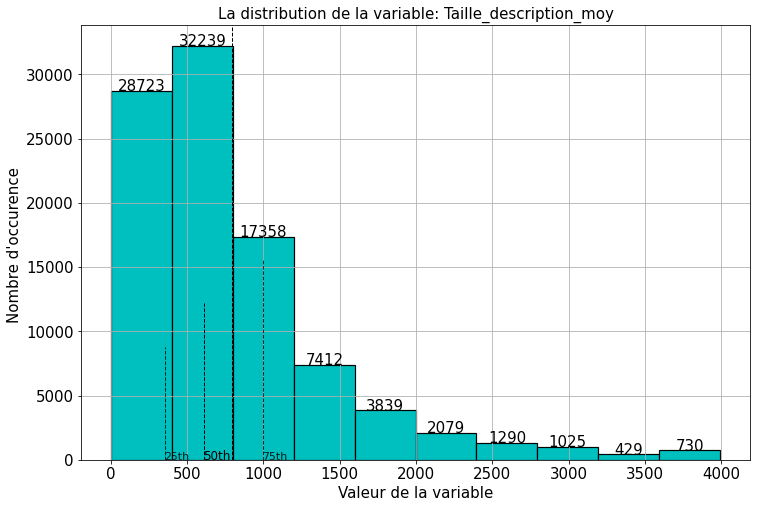

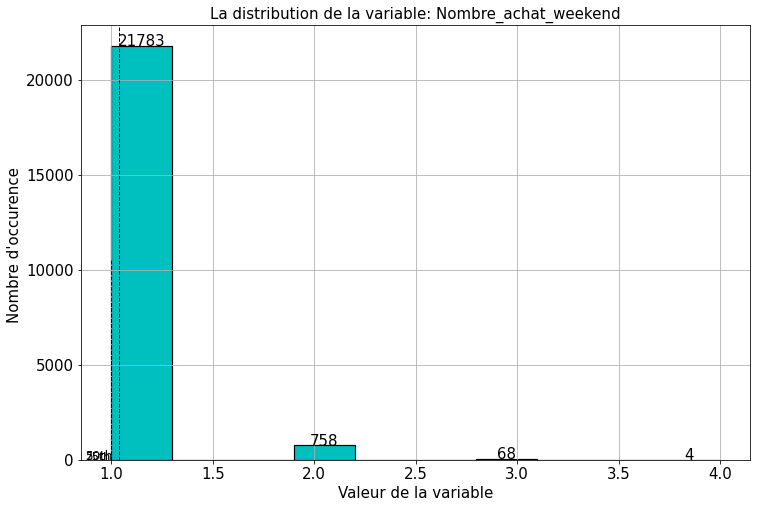

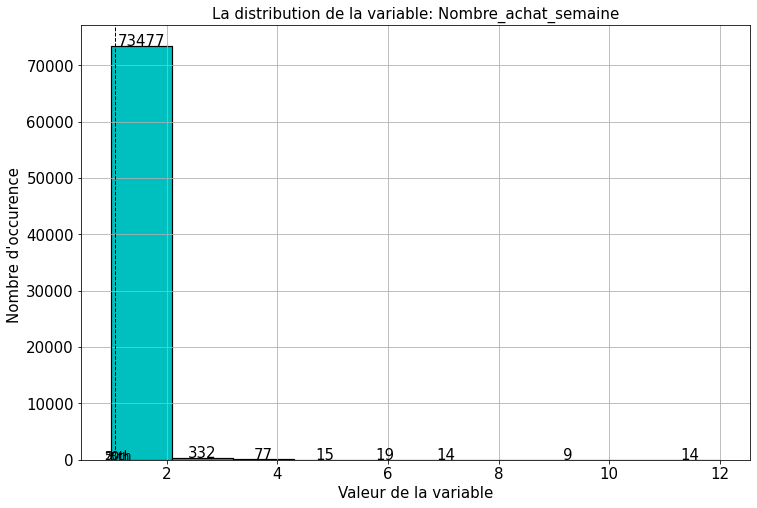

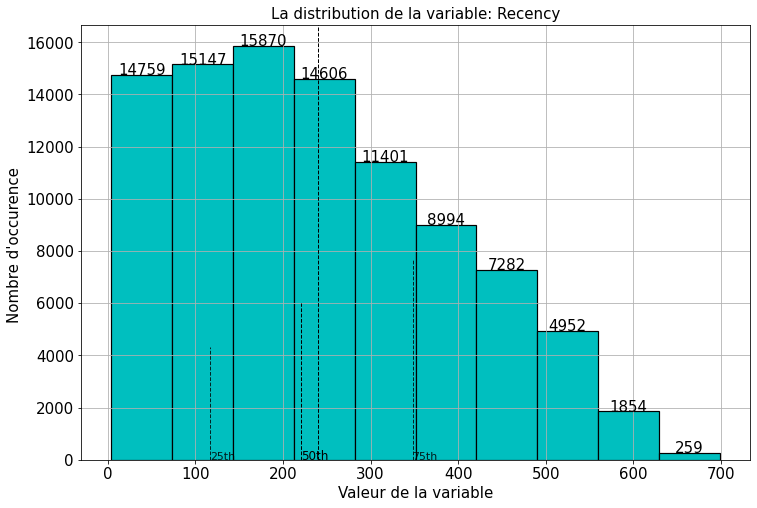

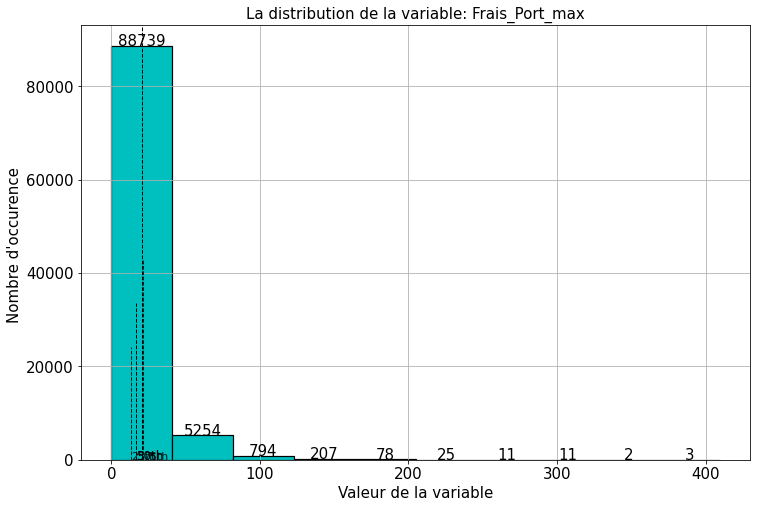

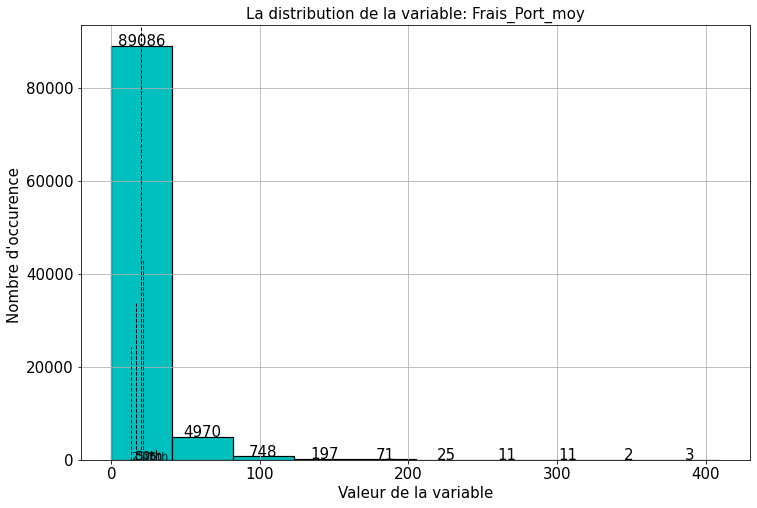

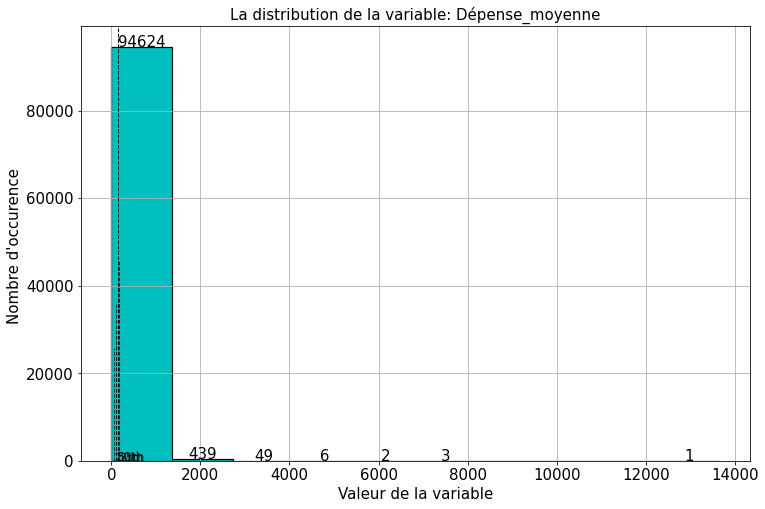

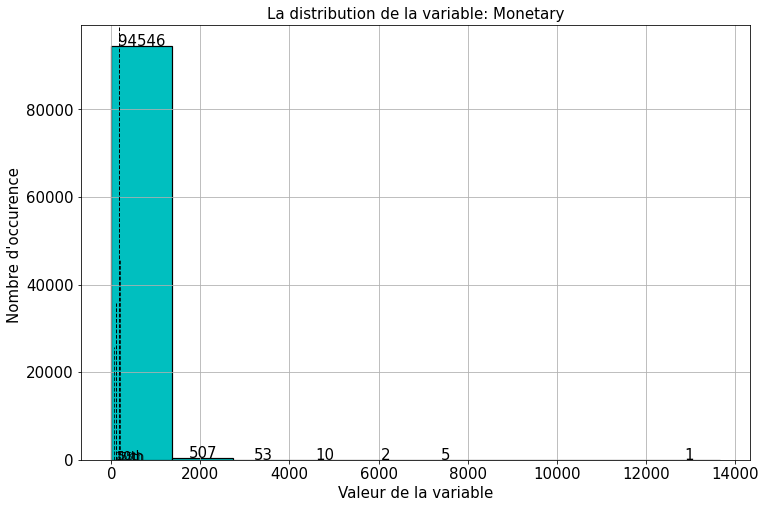

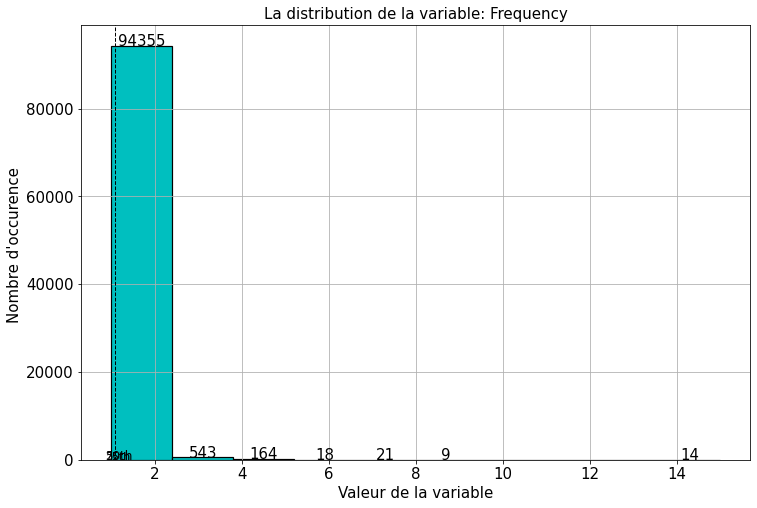

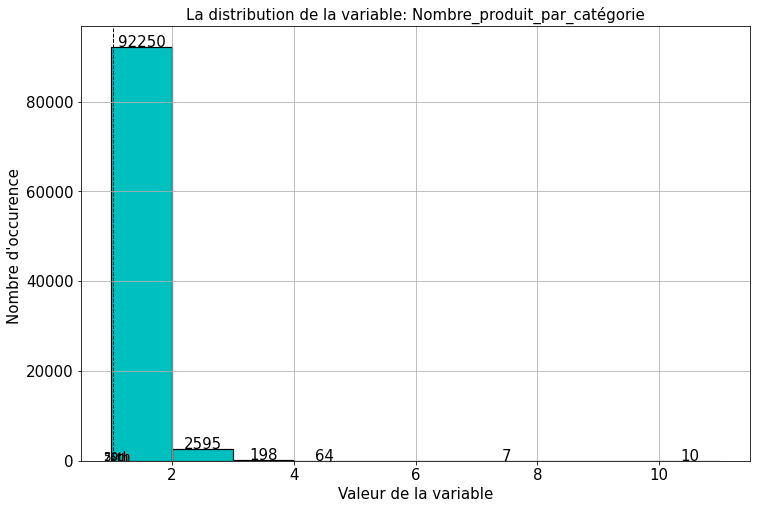

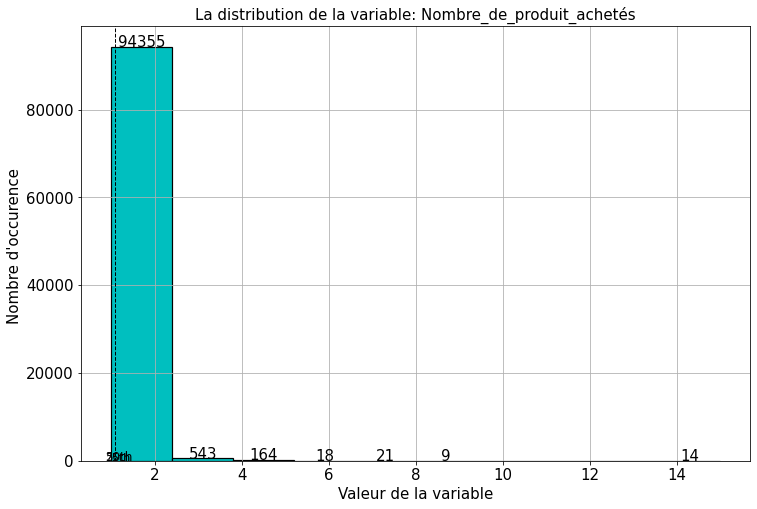

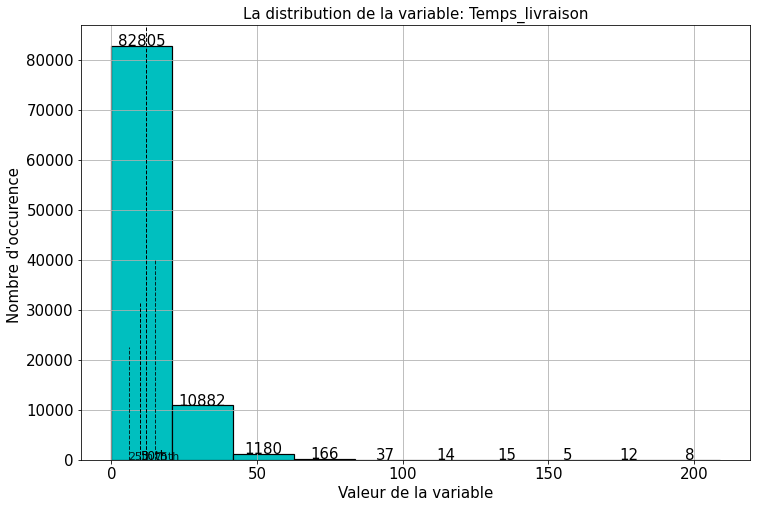

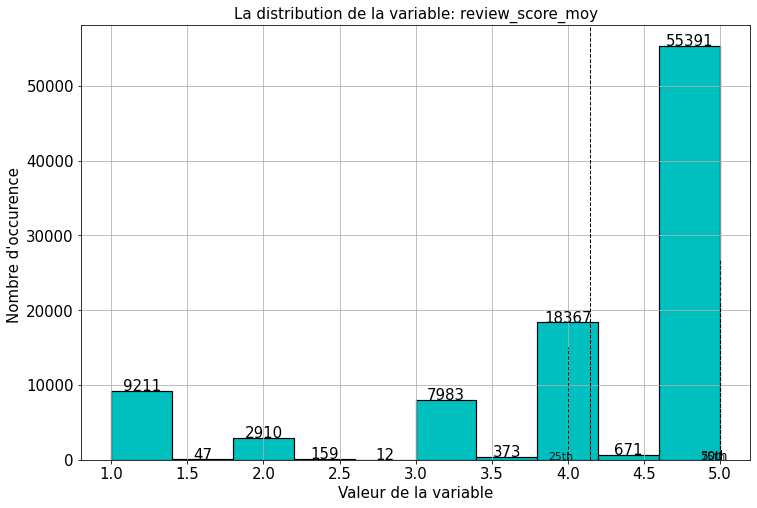

ValueError: too many values to unpack (expected 3)

In [72]:
num_dist = ['Taille_description_moy', 'Nombre_achat_weekend',
            'Nombre_achat_semaine', 'Recency', 'Frais_Port_max',
            'Frais_Port_moy',
            'Dépense_moyenne', 'Monetary', 'Frequency',
            'Nombre_produit_par_catégorie', 'Nombre_de_produit_achetés',
            'Temps_livraison', 'review_score_moy']
for elt in num_dist :
    histogram(data[elt],elt) 

On remarque l'asymétrie des distributions, et la présence des Outliers comme pour:
- Nombre_de_produit_achetés
- Nombre_produit_par_catégorie
- Frequency
- Monetary
- Dépense_moyenne
- Frais_Port_moy
- Nombre_achat_weekend
- Frais_Port_max
- Nombre_achat_semaine

On va effectuer des transformations par la suite pour rendre ces distributions plus symétriques 

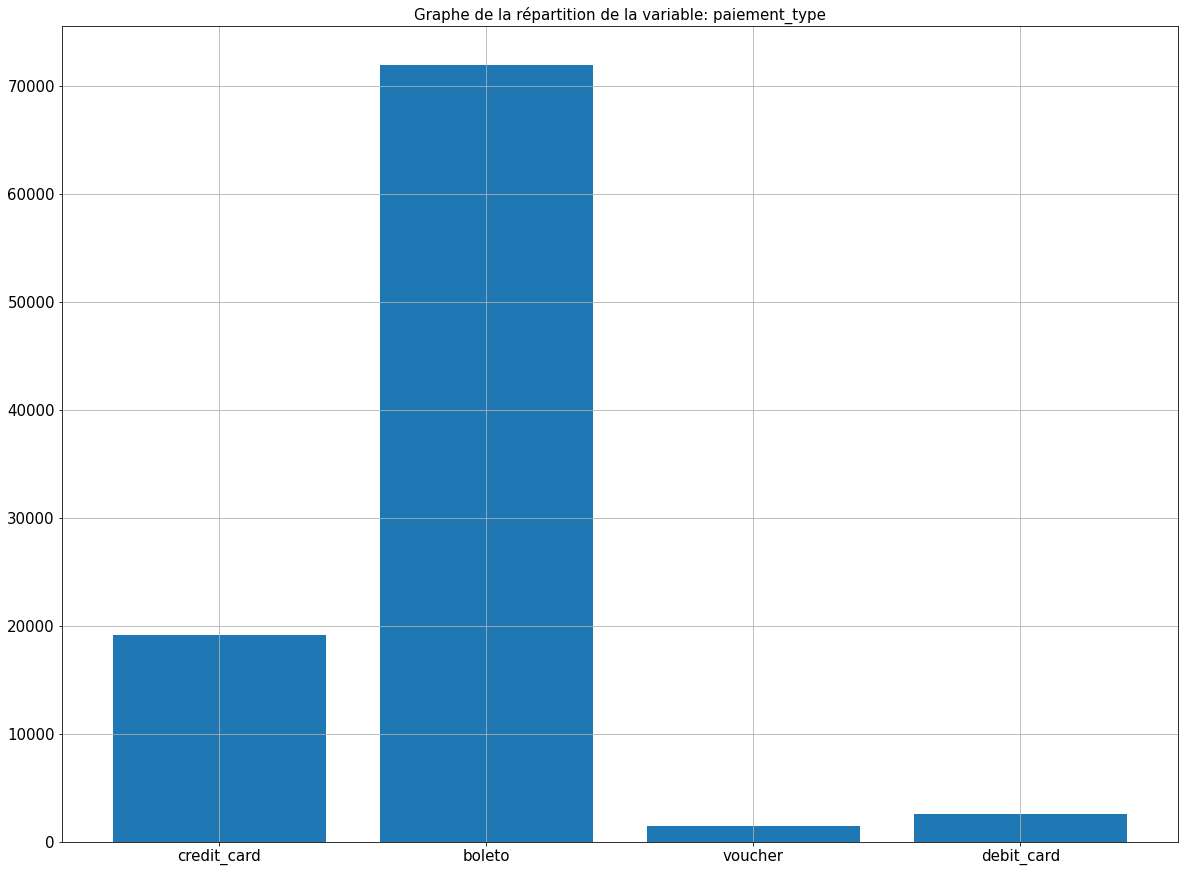

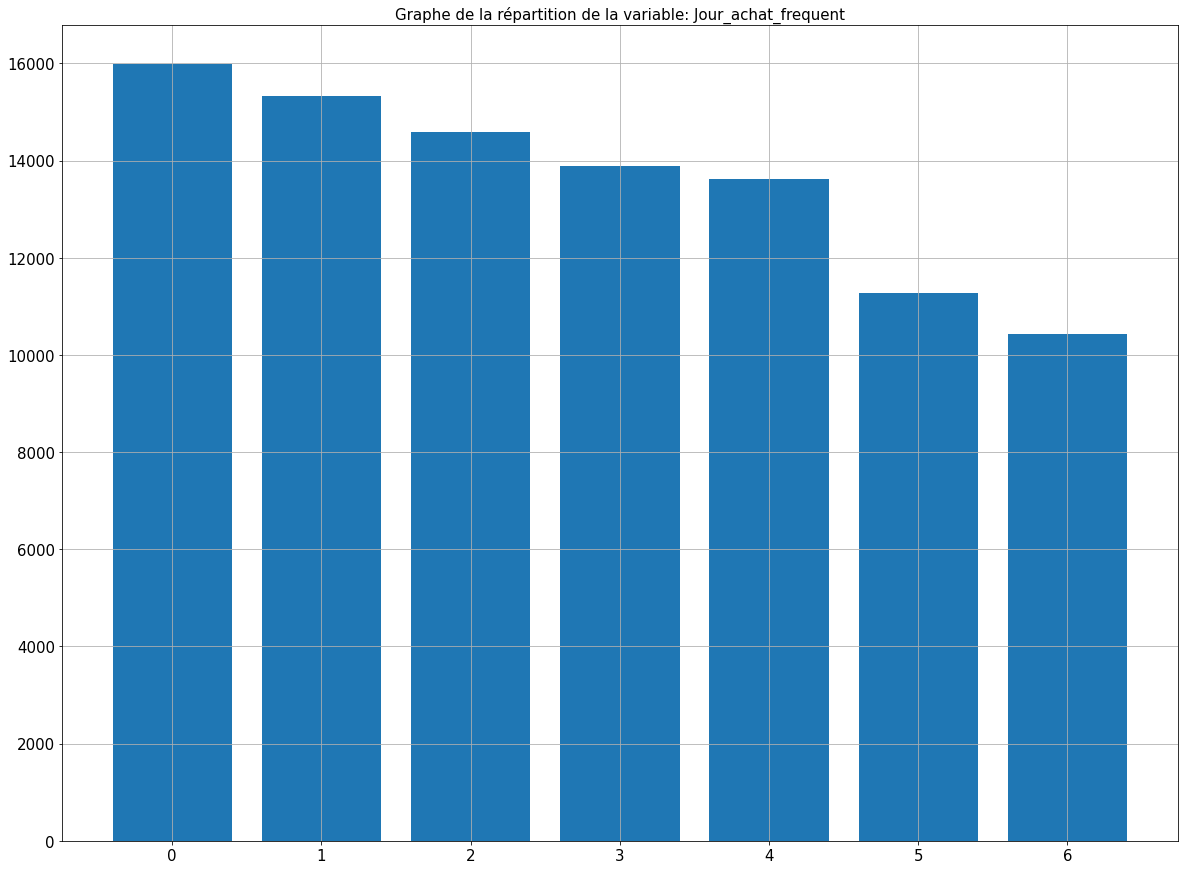

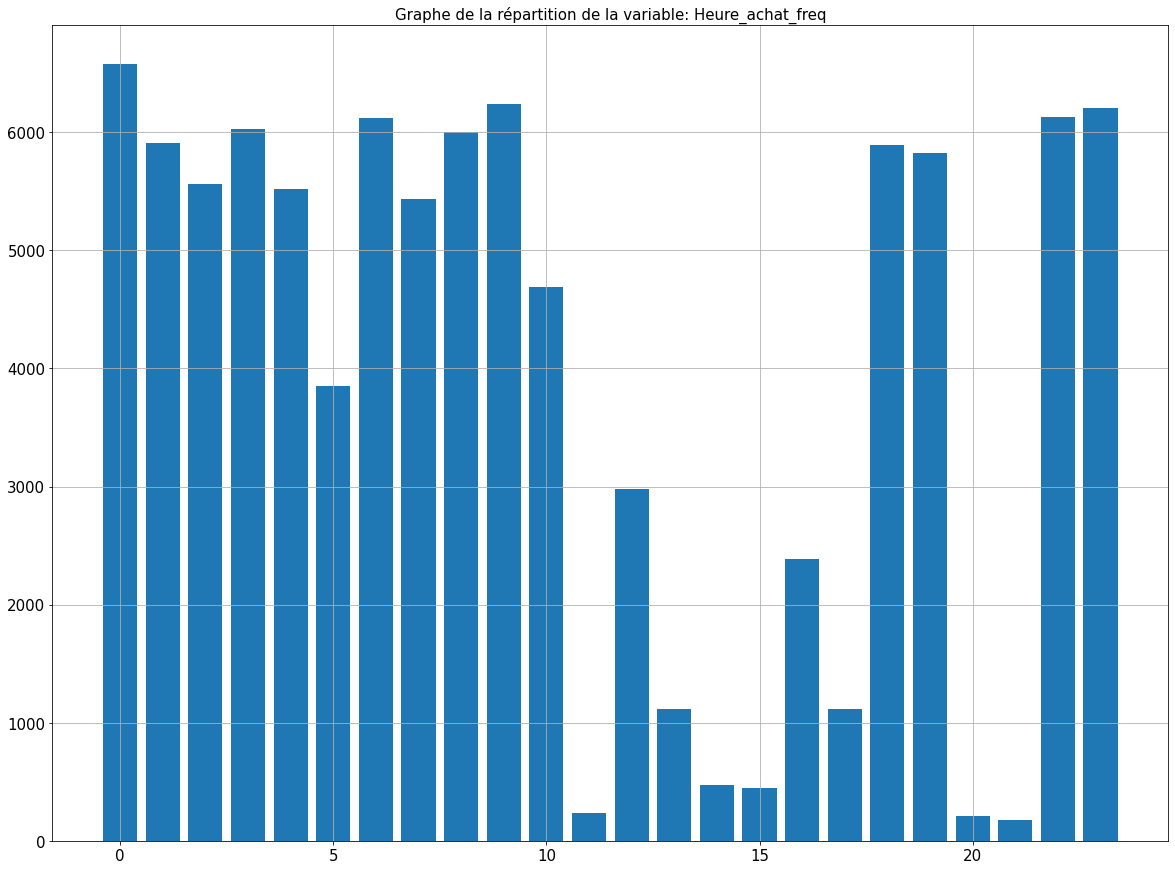

In [73]:
def BarPlot(data, name):
    BIGGER_SIZE = 15
    plt.rc('font', size=BIGGER_SIZE)  # taille de texte par défaut
    plt.rc('axes', titlesize=BIGGER_SIZE)  # taille des titres des axes
    plt.rc('axes', labelsize=BIGGER_SIZE)  # taille des labels des axes
    plt.rc('xtick', labelsize=BIGGER_SIZE)  # taille des ticks des ascisses
    plt.rc('ytick', labelsize=BIGGER_SIZE)  # taille des ticks des ordonnées
    plt.rc('figure', titlesize=BIGGER_SIZE)  # taille du titre
    plt.rc('figure', titlesize=BIGGER_SIZE)
    plt.figure(figsize=(20, 15))
    plt.bar(height=data.groupby(name).count()['Taille_description_moy'],
            x=list(data.groupby(name).count(
                   )['Taille_description_moy'].sort_values(
                   ascending=False).index))
    plt.grid()
    plt.title("Graphe de la répartition de la variable: " + name)
    plt.show()


cat = ['paiement_type', 'Jour_achat_frequent', 'Heure_achat_freq']
for elt in cat:
    BarPlot(data, elt)

On remarque que la catégorier la plus utilisée pour le paiement est Boleto avec plus de 75% des paiements, puis on trouve les 'credit_card' avec plus de 19% et 'debit_card' avec 2.67% et 'voucher' avec seulement 1.53%

### Analyse bivariée

####  Les Graphiques à deux variables

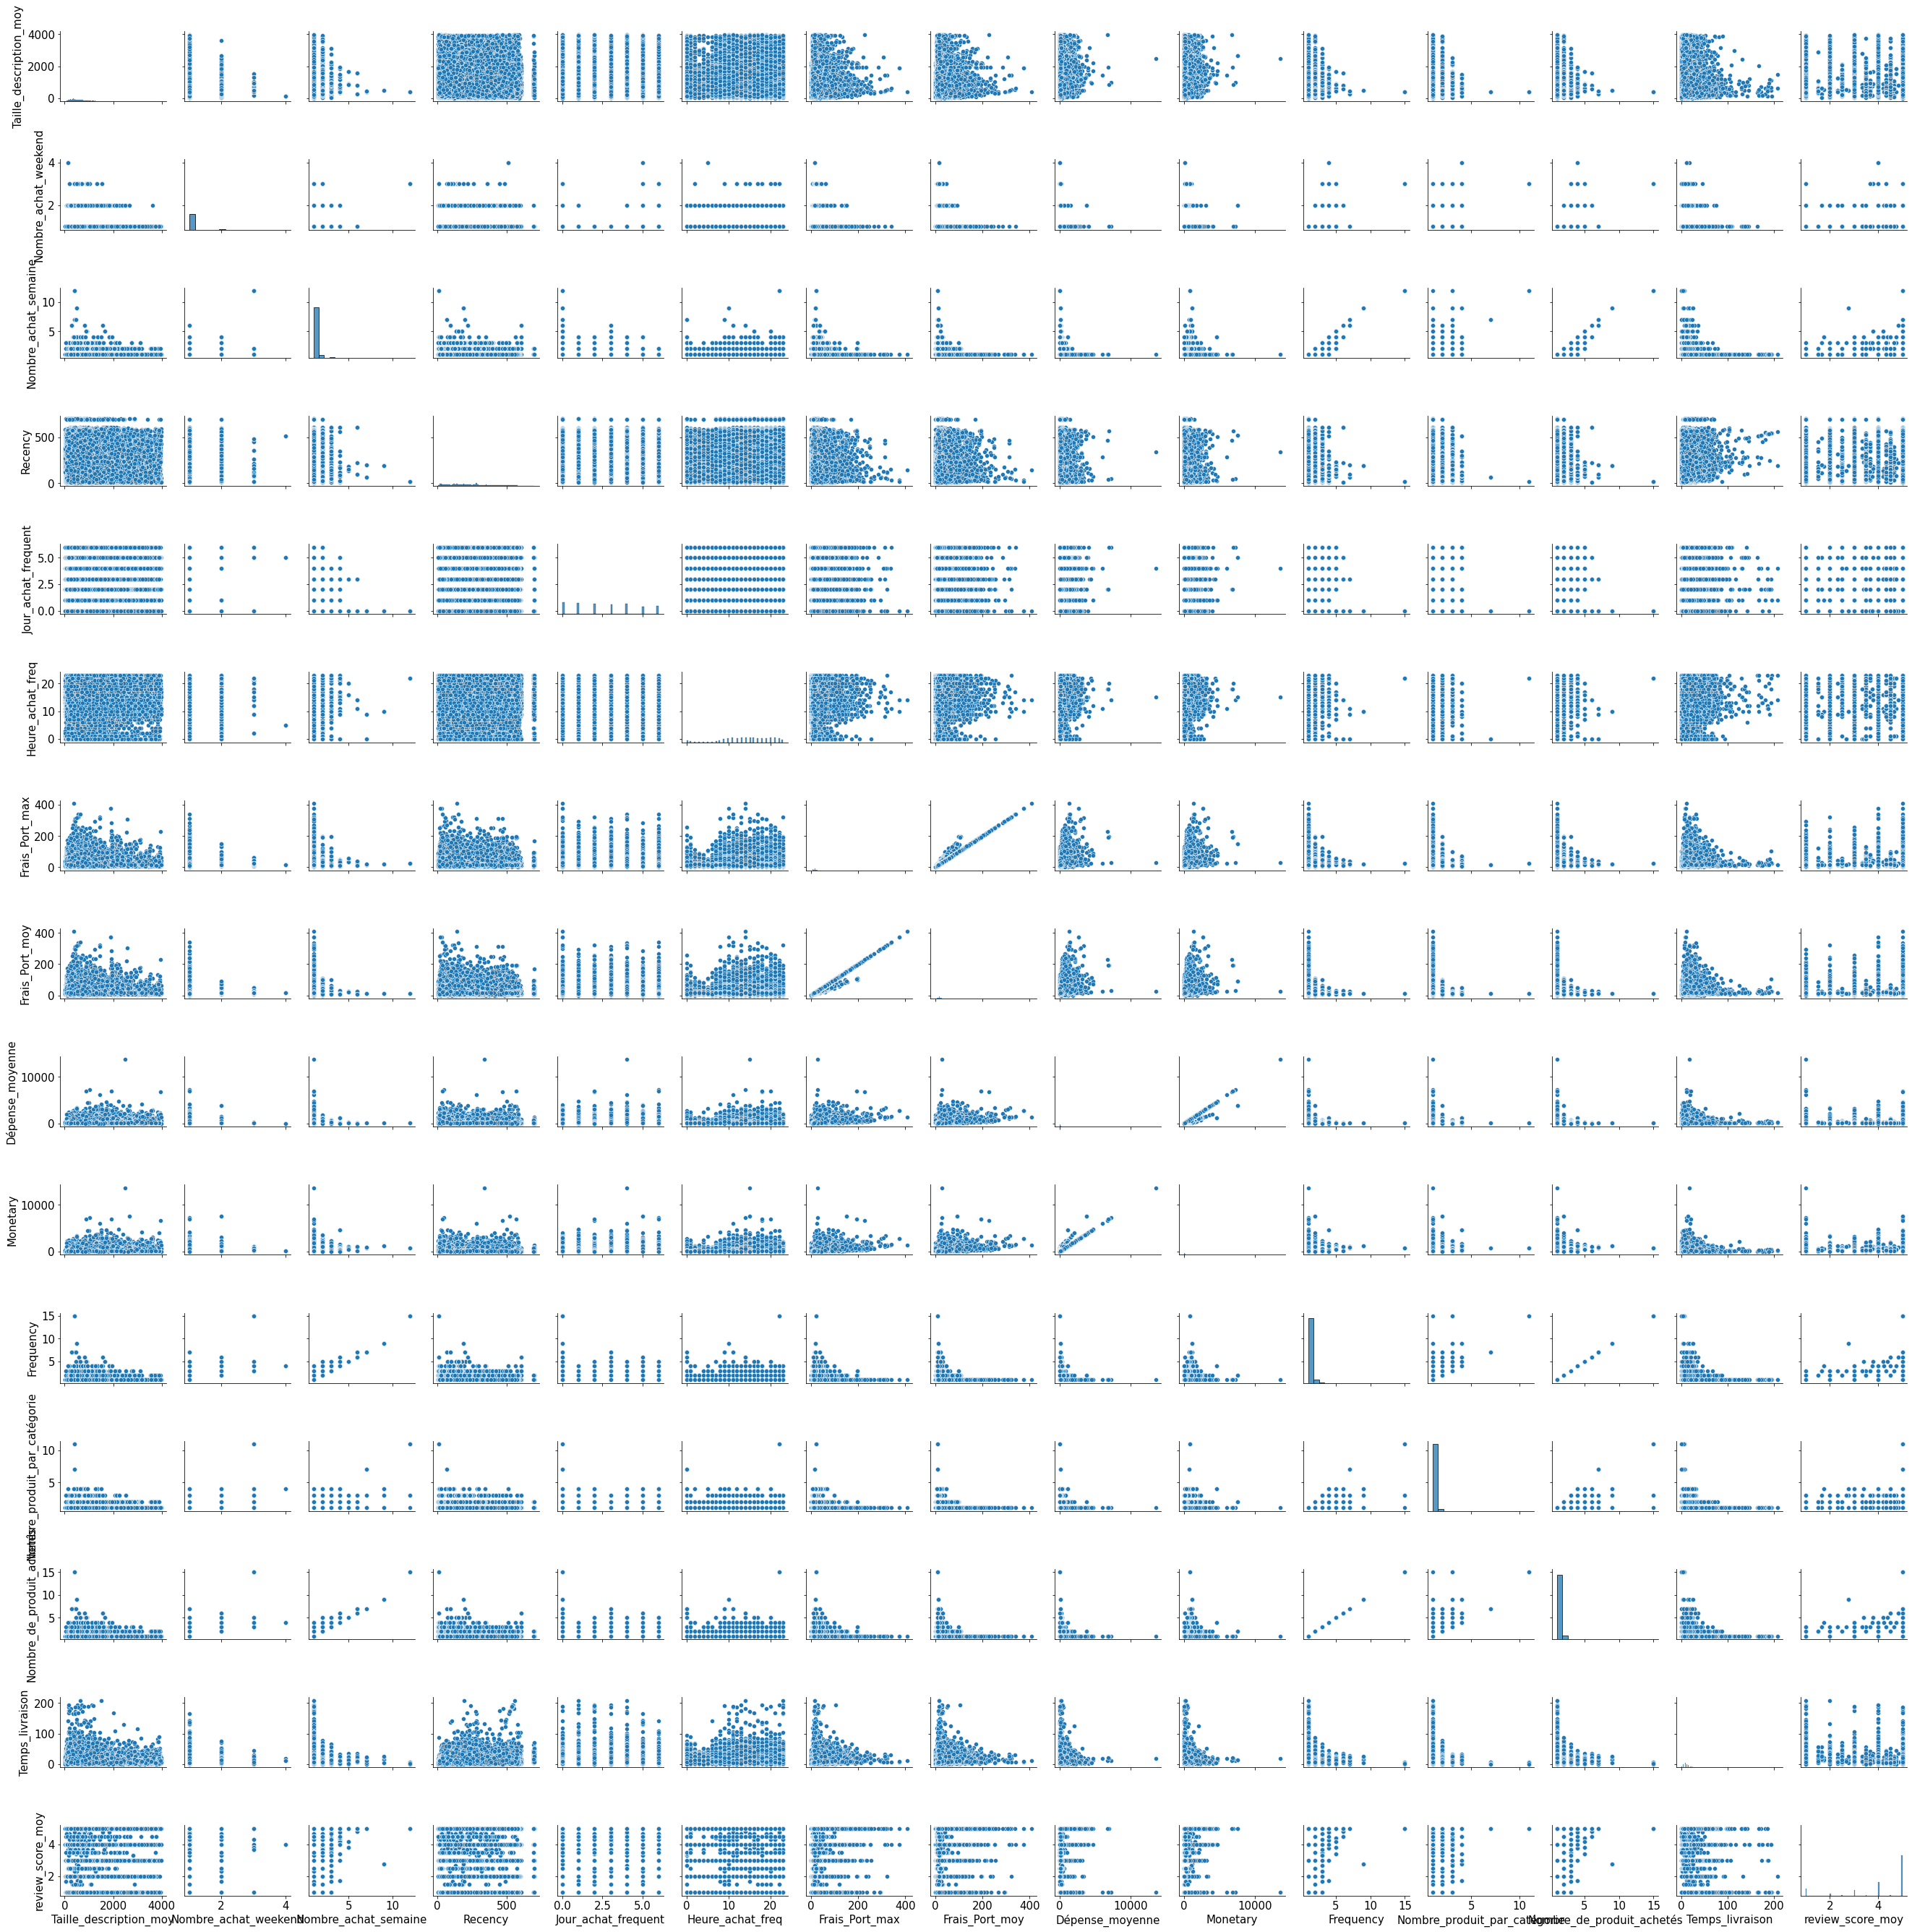

In [74]:
sns.pairplot(data)

On remarque la corrélation entre les variables:
- Frequency et Nombre_produits_achetés
- Monetary et Dépense_moyenne
- Frais_port_moy et Frais_port_max



#### La matrice de corrélation

Dans cette partie, on va créer la matrice des corrélations, pour étudier la corrélation entre nos variables

In [75]:
matrice_corr = data._get_numeric_data().corr()
matrice_corr

,Taille_description_moy,Nombre_achat_weekend,Nombre_achat_semaine,Recency,Jour_achat_frequent,Heure_achat_freq,Frais_Port_max,Frais_Port_moy,Dépense_moyenne,Monetary,Frequency,Nombre_produit_par_catégorie,Nombre_de_produit_achetés,Temps_livraison,review_score_moy
Taille_description_moy,1.000000,-0.041784,-0.016494,-0.036654,-0.006656,-0.003738,0.097247,0.099473,0.186664,0.175091,-0.019778,-0.015919,-0.019778,0.003434,0.013880
Nombre_achat_weekend,-0.041784,1.000000,0.457265,0.000153,-0.040422,-0.024600,0.031368,-0.013237,-0.018430,0.130941,0.577493,0.505512,0.577493,0.005301,0.007148
Nombre_achat_semaine,-0.016494,0.457265,1.000000,-0.031742,-0.025076,-0.026095,0.036797,-0.019351,-0.012441,0.190435,0.917266,0.684713,0.917266,-0.008529,0.013594
Recency,-0.036654,0.000153,-0.031742,1.000000,0.011597,0.009604,-0.047398,-0.044563,-0.002647,-0.012480,-0.038588,-0.008959,-0.038588,0.097280,-0.010746
Jour_achat_frequent,-0.006656,-0.040422,-0.025076,0.011597,1.000000,0.010819,0.000972,0.002961,-0.002472,-0.009980,-0.029002,-0.022604,-0.029002,0.029024,-0.009928
Heure_achat_freq,-0.003738,-0.024600,-0.026095,0.009604,0.010819,1.000000,0.005742,0.007103,0.004943,-0.002573,-0.028377,-0.022313,-0.028377,-0.004083,0.003177
Frais_Port_max,0.097247,0.031368,0.036797,-0.047398,0.000972,0.005742,1.000000,0.991587,0.450250,0.446095,0.039966,0.012219,0.039966,0.211653,-0.035577
Frais_Port_moy,0.099473,-0.013237,-0.019351,-0.044563,0.002961,0.007103,0.991587,1.000000,0.454782,0.431467,-0.018107,-0.018288,-0.018107,0.214735,-0.036817
Dépense_moyenne,0.186664,-0.018430,-0.012441,-0.002647,-0.002472,0.004943,0.450250,0.454782,1.000000,0.957388,-0.013587,-0.003498,-0.013587,0.068339,-0.043128
Monetary,0.175091,0.130941,0.190435,-0.012480,-0.009980,-0.002573,0.446095,0.431467,0.957388,1.000000,0.190489,0.152862,0.190489,0.064374,-0.038673


<Figure size 1296x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations')

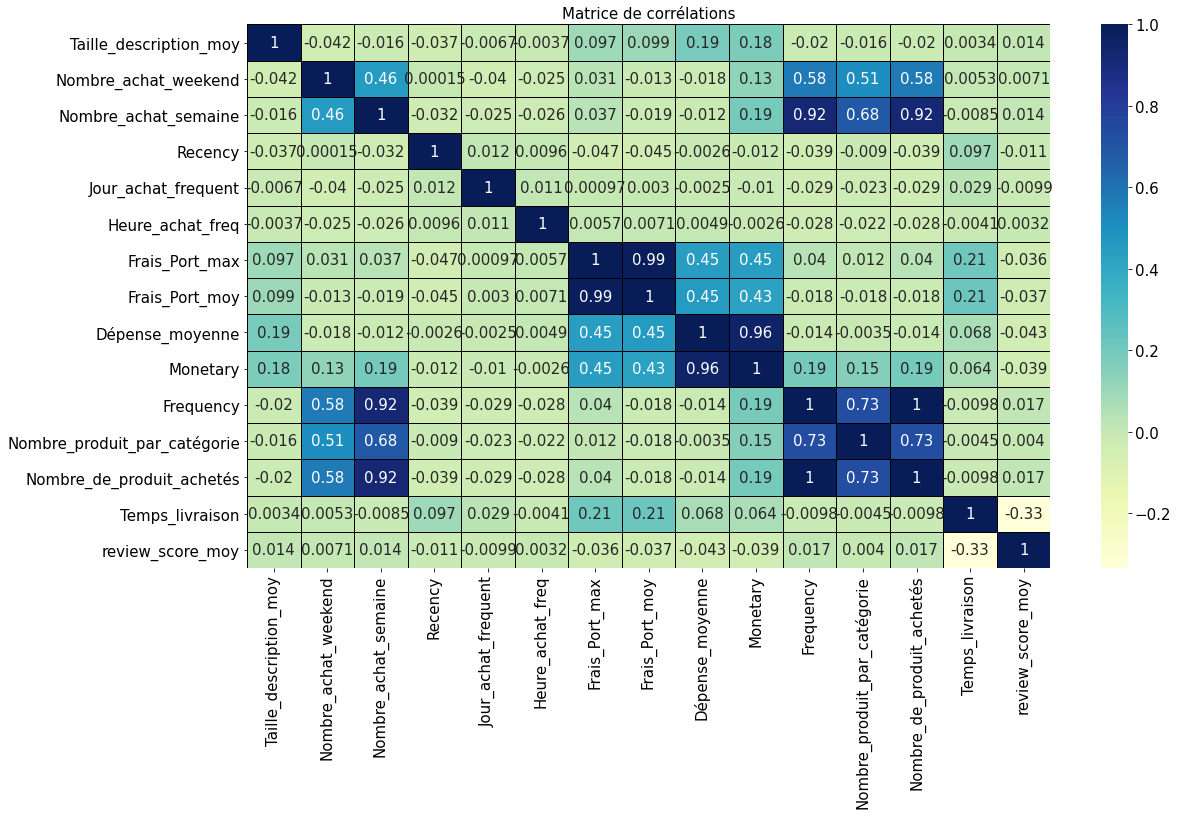

In [76]:
plt.figure(figsize=(18, 10))
sns.heatmap(matrice_corr, linewidths=.5, cmap="YlGnBu", annot=True,
            linecolor='black')
plt.title('Matrice de corrélations')
plt.show()

On remarque une forte corrélation entre: 
- Nombre_de_produit_achetés avec: Frequency et Nombre_achat_semaine
- Frequency avec: Nombre_achat_semaine
- Monetary avec: Dépense_moyenne
- Frais_Port_max avec Frais_Port_moy


### Réduction dimensionnelle

#### prétraitement de données

On va imputer les données manquantes et transformer les données catégorielles en données numériques.

In [77]:
data.isnull().mean()

Taille_description_moy          0.000000
paiement_type                   0.000000
Nombre_achat_weekend            0.762279
Nombre_achat_semaine            0.222520
customer_unique_id              0.000000
Recency                         0.000000
Jour_achat_frequent             0.000000
Heure_achat_freq                0.000000
Frais_Port_max                  0.000000
Frais_Port_moy                  0.000000
Dépense_moyenne                 0.000000
Monetary                        0.000000
Frequency                       0.000000
Nombre_produit_par_catégorie    0.000000
Nombre_de_produit_achetés       0.000000
Temps_livraison                 0.000000
review_score_moy                0.000000
dtype: float64

In [78]:
data[data.Nombre_achat_weekend.isna()][['Nombre_achat_weekend',
                                        'Frequency', 'Nombre_achat_semaine']].describe()

,Nombre_achat_weekend,Frequency,Nombre_achat_semaine
count,0.0,72511.000000,72511.000000
mean,NaN,1.060570,1.060570
std,NaN,0.297045,0.297045
min,NaN,1.000000,1.000000
25%,NaN,1.000000,1.000000
50%,NaN,1.000000,1.000000
75%,NaN,1.000000,1.000000
max,NaN,9.000000,9.000000


2:80: E501 line too long (88 > 79 characters)


In [79]:
data[data.Nombre_achat_weekend.isna() & (
    data.Nombre_achat_semaine != data.Frequency)][['Nombre_achat_weekend',
                                                   'Frequency',
                                                   'Nombre_achat_semaine']]

,Nombre_achat_weekend,Frequency,Nombre_achat_semaine


In [80]:
data.isnull().mean()

Taille_description_moy          0.000000
paiement_type                   0.000000
Nombre_achat_weekend            0.762279
Nombre_achat_semaine            0.222520
customer_unique_id              0.000000
Recency                         0.000000
Jour_achat_frequent             0.000000
Heure_achat_freq                0.000000
Frais_Port_max                  0.000000
Frais_Port_moy                  0.000000
Dépense_moyenne                 0.000000
Monetary                        0.000000
Frequency                       0.000000
Nombre_produit_par_catégorie    0.000000
Nombre_de_produit_achetés       0.000000
Temps_livraison                 0.000000
review_score_moy                0.000000
dtype: float64

In [81]:
data[data.Nombre_achat_semaine.isna()][['Nombre_achat_weekend',
                                        'Frequency', 'Nombre_achat_semaine']]

,Nombre_achat_weekend,Frequency,Nombre_achat_semaine
6,1.0,1,NaN
7,1.0,1,NaN
13,1.0,1,NaN
14,1.0,1,NaN
27,1.0,1,NaN
...,...,...,...
95096,1.0,1,NaN
95103,1.0,1,NaN
95104,1.0,1,NaN
95105,1.0,1,NaN


In [82]:
data[data.Nombre_achat_semaine.isna()][['Nombre_achat_weekend',
                                        'Frequency',
                                        'Nombre_achat_semaine']].describe()

,Nombre_achat_weekend,Frequency,Nombre_achat_semaine
count,21167.000000,21167.000000,0.0
mean,1.034488,1.034488,NaN
std,0.194513,0.194513,NaN
min,1.000000,1.000000,NaN
25%,1.000000,1.000000,NaN
50%,1.000000,1.000000,NaN
75%,1.000000,1.000000,NaN
max,4.000000,4.000000,NaN


In [83]:
data = data.fillna(value={'Nombre_achat_weekend':0,  'Nombre_achat_semaine':0})

ValueError: too many values to unpack (expected 3)

In [84]:
data.isnull().mean()

Taille_description_moy          0.0
paiement_type                   0.0
Nombre_achat_weekend            0.0
Nombre_achat_semaine            0.0
customer_unique_id              0.0
Recency                         0.0
Jour_achat_frequent             0.0
Heure_achat_freq                0.0
Frais_Port_max                  0.0
Frais_Port_moy                  0.0
Dépense_moyenne                 0.0
Monetary                        0.0
Frequency                       0.0
Nombre_produit_par_catégorie    0.0
Nombre_de_produit_achetés       0.0
Temps_livraison                 0.0
review_score_moy                0.0
dtype: float64

In [85]:
enc = OrdinalEncoder()
data['paiement_type'] = enc.fit_transform(
                        data['paiement_type'].values.reshape(-1, 1))
enc.categories_

[array(['boleto', 'credit_card', 'debit_card', 'voucher'], dtype=object)]

In [86]:
data.head()

,Taille_description_moy,paiement_type,Nombre_achat_weekend,Nombre_achat_semaine,customer_unique_id,Recency,Jour_achat_frequent,Heure_achat_freq,Frais_Port_max,Frais_Port_moy,Dépense_moyenne,Monetary,Frequency,Nombre_produit_par_catégorie,Nombre_de_produit_achetés,Temps_livraison,review_score_moy
0,598.0,1.0,0.0,1.0,871766c5855e863f6eccc05f988b23cb,355,2,8,13.29,13.29,72.19,72.19,1,1,1,7,5.0
1,598.0,0.0,0.0,1.0,0fb8e3eab2d3e79d92bb3fffbb97f188,431,2,11,17.96,17.96,73.86,73.86,1,1,1,15,5.0
2,598.0,1.0,0.0,1.0,3419052c8c6b45daf79c1e426f9e9bcb,107,4,10,18.33,18.33,83.23,83.23,1,1,1,17,4.0
3,598.0,1.0,0.0,1.0,e7c828d22c0682c1565252deefbe334d,397,1,18,16.17,16.17,75.07,75.07,1,1,1,8,5.0
4,598.0,1.0,0.0,1.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,388,3,21,13.29,13.29,72.19,72.19,1,1,1,13,5.0


In [87]:
y = data['customer_unique_id']

In [88]:
data = data.drop(columns=['customer_unique_id'], axis=1)

In [89]:
data.head()

,Taille_description_moy,paiement_type,Nombre_achat_weekend,Nombre_achat_semaine,Recency,Jour_achat_frequent,Heure_achat_freq,Frais_Port_max,Frais_Port_moy,Dépense_moyenne,Monetary,Frequency,Nombre_produit_par_catégorie,Nombre_de_produit_achetés,Temps_livraison,review_score_moy
0,598.0,1.0,0.0,1.0,355,2,8,13.29,13.29,72.19,72.19,1,1,1,7,5.0
1,598.0,0.0,0.0,1.0,431,2,11,17.96,17.96,73.86,73.86,1,1,1,15,5.0
2,598.0,1.0,0.0,1.0,107,4,10,18.33,18.33,83.23,83.23,1,1,1,17,4.0
3,598.0,1.0,0.0,1.0,397,1,18,16.17,16.17,75.07,75.07,1,1,1,8,5.0
4,598.0,1.0,0.0,1.0,388,3,21,13.29,13.29,72.19,72.19,1,1,1,13,5.0


In [90]:
data.dtypes

Taille_description_moy          float64
paiement_type                   float64
Nombre_achat_weekend            float64
Nombre_achat_semaine            float64
Recency                           int64
Jour_achat_frequent               int64
Heure_achat_freq                  int32
Frais_Port_max                  float64
Frais_Port_moy                  float64
Dépense_moyenne                 float64
Monetary                        float64
Frequency                         int64
Nombre_produit_par_catégorie      int64
Nombre_de_produit_achetés         int64
Temps_livraison                   int64
review_score_moy                float64
dtype: object

In [91]:
order.Temps_livraison

0        7 days 14:44:46
1       15 days 08:47:09
2       17 days 08:08:33
3        8 days 02:47:51
4       13 days 22:15:41
              ...       
95119    9 days 07:21:54
95120   21 days 07:59:33
95121    6 days 07:32:33
95122   20 days 20:47:33
95123    7 days 22:00:59
Name: Temps_livraison, Length: 95124, dtype: timedelta64[ns]

In [92]:
data.head()

,Taille_description_moy,paiement_type,Nombre_achat_weekend,Nombre_achat_semaine,Recency,Jour_achat_frequent,Heure_achat_freq,Frais_Port_max,Frais_Port_moy,Dépense_moyenne,Monetary,Frequency,Nombre_produit_par_catégorie,Nombre_de_produit_achetés,Temps_livraison,review_score_moy
0,598.0,1.0,0.0,1.0,355,2,8,13.29,13.29,72.19,72.19,1,1,1,7,5.0
1,598.0,0.0,0.0,1.0,431,2,11,17.96,17.96,73.86,73.86,1,1,1,15,5.0
2,598.0,1.0,0.0,1.0,107,4,10,18.33,18.33,83.23,83.23,1,1,1,17,4.0
3,598.0,1.0,0.0,1.0,397,1,18,16.17,16.17,75.07,75.07,1,1,1,8,5.0
4,598.0,1.0,0.0,1.0,388,3,21,13.29,13.29,72.19,72.19,1,1,1,13,5.0


In [93]:
# On va centrer et réduire les données avant ACP
features = data.columns
df_scaled = sklearn.preprocessing.StandardScaler().fit_transform(data)
len(features)
# On vérifie que la normalisation est un succès
print("Moyennes :\n", np.mean(df_scaled, axis=0))
print("\nÉcarts-types :\n", np.std(df_scaled, axis=0))
print("\nMatrice de corrélation :\n", (1/df_scaled.shape[0])
      * np.matmul(np.transpose(df_scaled),
                  df_scaled))

16

In [94]:
df_scaled

array([[-0.301431  ,  0.23589407, -0.54363208, ..., -0.20506358,
        -0.53325044,  0.66661424],
       [-0.301431  , -1.5645703 , -0.54363208, ..., -0.20506358,
         0.30467238,  0.66661424],
       [-0.301431  ,  0.23589407, -0.54363208, ..., -0.20506358,
         0.51415308, -0.11230471],
       ...,
       [ 0.7917559 , -1.5645703 , -0.54363208, ..., -0.20506358,
        -0.63799079, -0.11230471],
       [ 1.7629629 , -1.5645703 , -0.54363208, ..., -0.20506358,
         0.82837414, -2.44906157],
       [-0.85111255,  0.23589407, -0.54363208, ..., -0.20506358,
        -0.53325044,  0.66661424]])

####  Analyse des Composantes principales

In [95]:
# from math import round
acp = PCA()
acp.fit_transform(df_scaled)
# Éléments nécessaire au choix du nombre de composantes principales

array([[-4.82702814e-01, -9.60866850e-01, -7.42425713e-01, ...,
         7.77550296e-04,  6.14461356e-17,  3.81136536e-15],
       [-3.16261194e-01, -5.54708545e-01, -8.40896976e-01, ...,
         2.14939616e-04,  3.13670437e-16, -5.89241674e-16],
       [-3.64324328e-01, -2.82605496e-01, -2.27473949e-01, ...,
        -7.02693072e-04,  1.74290669e-12, -2.40369300e-16],
       ...,
       [-1.18251005e-01,  6.88262789e-02, -3.41837887e-01, ...,
         6.76017697e-03, -7.41239211e-17,  2.63194025e-17],
       [ 2.14207711e+01,  3.40926177e+01, -3.11387368e+00, ...,
         1.09886236e-01, -4.63989411e-17,  1.39549798e-18],
       [-5.36968453e-01, -8.03263714e-01, -4.04410820e-01, ...,
         5.36399257e-04, -7.73796036e-17,  1.06068701e-17]])

In [96]:
print("Valeurs propres :\n", acp.explained_variance_)
acp.explained_variance_

array([3.20658466e+00, 2.87738515e+00, 2.22484309e+00, 1.35773096e+00,
       1.11775493e+00, 1.02607935e+00, 1.00449016e+00, 9.56211024e-01,
       9.02252735e-01, 6.10459340e-01, 3.70220758e-01, 3.18300572e-01,
       2.21759194e-02, 5.67955235e-03, 5.99677852e-29, 6.32242813e-34])

In [97]:
print("\nQualité de représentation des axes en % :\n",
      acp.explained_variance_ratio_ * 100)
acp.explained_variance_ratio_ * 100

array([2.00409434e+01, 1.79834681e+01, 1.39051231e+01, 8.48572927e+00,
       6.98589490e+00, 6.41292853e+00, 6.27799753e+00, 5.97625607e+00,
       5.63902031e+00, 3.81533076e+00, 2.31385541e+00, 1.98935766e+00,
       1.38598039e-01, 3.54968290e-02, 3.74794717e-28, 3.95147604e-33])

In [116]:
print("\nQualité cumulée en % :\n ", np.round(np.cumsum(
                                              acp.explained_variance_ratio_) *
                                              100,
                                              1))
np.round(np.cumsum(acp.explained_variance_ratio_) * 100, 1)

array([20. , 38. , 51.9, 60.4, 67.4, 73.8, 80.1, 86.1, 91.7, 95.5])

<Figure size 864x576 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, "rang de l'axe d'inertie")

Text(0, 0.5, "pourcentage d'inertie")

Text(0.5, 1.0, 'Eboulis des valeurs propres')

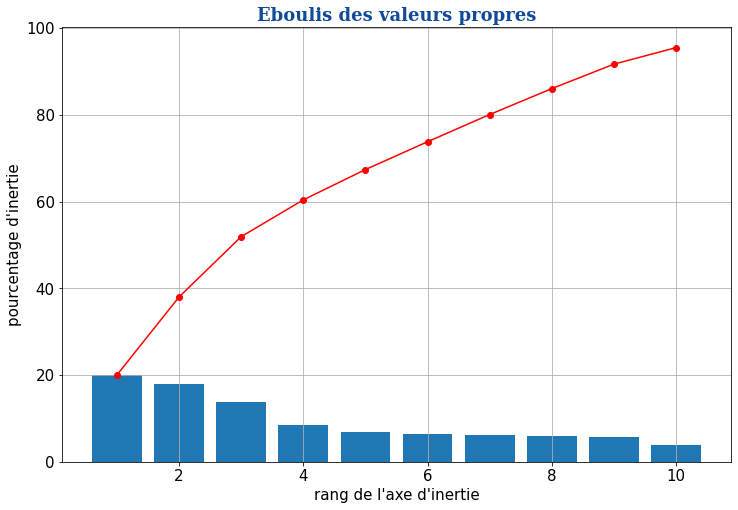

In [117]:
# Variances expliquées
varexpl = acp.explained_variance_ratio_*100
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18}
# Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(), c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.grid()
plt.title("Eboulis des valeurs propres", fontdict=font_title)
plt.show(block=False)

On remarque qu'avec 10 composantes principales on a plus de 95% de la variance expliquée.

In [100]:
# On génère ici l'ACP sur laquelle nous allons travailler
n = 10
acp = PCA(n)
composantes = acp.fit_transform(df_scaled)
features
# On affiche les premiers résultats
print("Valeurs propres :\n", acp.explained_variance_)
print("\nMatrice de changement de base :\n", acp.components_)
print("\nComposantes principales :\n", composantes)
print("\nSomme des composantes :\n", composantes.sum(axis=0))

Index(['Taille_description_moy', 'paiement_type', 'Nombre_achat_weekend',
       'Nombre_achat_semaine', 'Recency', 'Jour_achat_frequent',
       'Heure_achat_freq', 'Frais_Port_max', 'Frais_Port_moy',
       'Dépense_moyenne', 'Monetary', 'Frequency',
       'Nombre_produit_par_catégorie', 'Nombre_de_produit_achetés',
       'Temps_livraison', 'review_score_moy'],
      dtype='object')

In [101]:
acp.explained_variance_  # On rappelle les valeurs propres conservées

array([3.20658466, 2.87738515, 2.22484309, 1.35773096, 1.11775493,
       1.02607935, 1.00449016, 0.95621102, 0.90225274, 0.61045934])

In [102]:
acp.components_  # La matrice de changement de base, obtenue normalement à partir des vecteurs propres

array([[ 5.42154823e-02, -1.10510665e-02, -8.44192986e-02,
         3.84943676e-01, -3.23266122e-02, -1.54870246e-01,
        -2.58563452e-02,  2.33249354e-01,  2.08375341e-01,
         2.28107105e-01,  3.17086726e-01,  4.53969916e-01,
         3.87891536e-01,  4.53969916e-01,  5.17876035e-02,
        -1.45049740e-02],
       [ 1.28607193e-01, -2.67951303e-03,  1.00925432e-01,
        -2.50482235e-01, -4.36121759e-03,  1.33650172e-01,
         2.22526770e-02,  4.38607714e-01,  4.52097864e-01,
         4.23709382e-01,  3.63416637e-01, -2.38944806e-01,
        -2.08706394e-01, -2.38944806e-01,  1.47061375e-01,
        -6.63626518e-02],
       [-3.26554463e-02,  4.11391415e-02,  6.27692378e-01,
        -3.63600378e-01, -2.67622169e-03,  5.42551148e-01,
         2.44666773e-02, -4.00560385e-02, -5.33571470e-02,
        -4.40246563e-02,  7.31501533e-03,  2.43755931e-01,
         2.25008316e-01,  2.43755931e-01, -1.07674938e-02,
         6.99778088e-03],
       [ 2.08237372e-01,  5.74190587e

1:80: E501 line too long (102 > 79 characters)


In [103]:
composantes
# Les composantes principales données par la matrice de changement de base

array([[-4.82702814e-01, -9.60866850e-01, -7.42425713e-01, ...,
         1.27804041e+00, -2.38484045e-01, -2.83080951e-02],
       [-3.16261194e-01, -5.54708545e-01, -8.40896976e-01, ...,
        -1.27414469e-01, -3.31981219e-01,  2.51936878e-01],
       [-3.64324328e-01, -2.82605496e-01, -2.27473949e-01, ...,
         4.32604004e-01,  3.16887886e-01,  5.14220495e-01],
       ...,
       [-1.18251005e-01,  6.88262789e-02, -3.41837887e-01, ...,
        -2.13586318e-01, -4.84523694e-01, -7.01144023e-01],
       [ 2.14207711e+01,  3.40926177e+01, -3.11387368e+00, ...,
         2.09317010e+00,  1.20848874e+01,  1.69776483e+00],
       [-5.36968453e-01, -8.03263714e-01, -4.04410820e-01, ...,
        -3.42530395e-01,  7.68050254e-01,  2.95074762e-01]])

In [104]:
# La somme par colonne des composantes principales doit valoir 0
composantes.sum(axis=0)

array([ 9.52959933e-12,  6.92583768e-11, -9.94632154e-12,  4.81337192e-12,
       -1.72054593e-11,  8.13238366e-13, -1.06091247e-11,  2.19413376e-12,
        8.76509976e-12, -1.46325729e-11])

1:65: W291 trailing whitespace
2:24: W291 trailing whitespace


(-1.0, 1.0)

(-1.0, 1.0)

Text(0.09708333371548568, 0.21815454105982957, 'Taille_description_moy')

Text(-0.01978907742690094, -0.004545219608983886, 'paiement_type')

Text(-0.15116912352629583, 0.17119836606314576, 'Nombre_achat_weekend')

Text(0.6893162942548151, -0.42488943176089283, 'Nombre_achat_semaine')

Text(-0.05788706741570109, -0.007397870998108323, 'Recency')

Text(-0.2773252046530754, 0.2267088744910659, 'Jour_achat_frequent')

Text(-0.046300799803890305, 0.03774689758925017, 'Heure_achat_freq')

Text(0.4176781959806897, 0.7440039893360556, 'Frais_Port_max')

Text(0.3731364530204931, 0.7668871386809174, 'Frais_Port_moy')

Text(0.4084700029726016, 0.7187321617171415, 'Dépense_moyenne')

Text(0.5678052671165438, 0.6164584413871541, 'Monetary')

Text(0.8129211621417326, -0.40531865522937094, 'Frequency')

Text(0.6945950088026007, -0.3540256695037729, 'Nombre_produit_par_catégorie')

Text(0.8129211621417327, -0.4053186552293709, 'Nombre_de_produit_achetés')

Text(0.09273574584832765, 0.24945810661332507, 'Temps_livraison')

Text(-0.025973968587845477, -0.11257001674151447, 'review_score_moy')

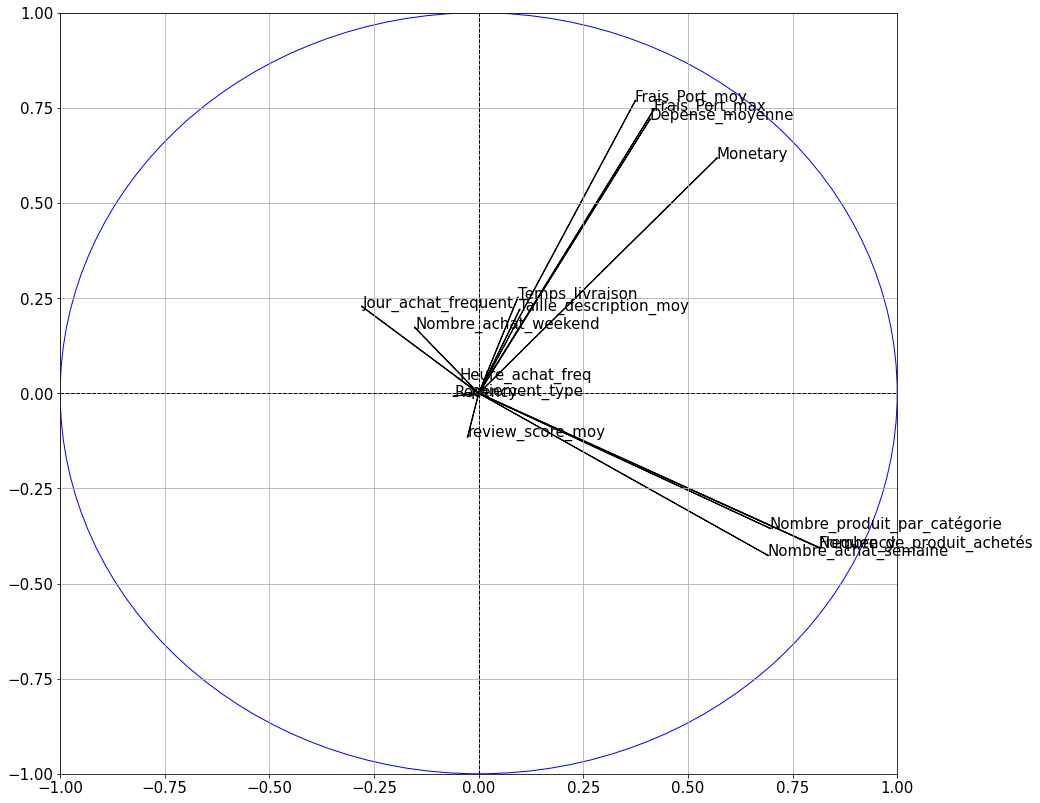

In [118]:
fig, axes = plt.subplots(figsize=(15, 14))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
sqrt_vp = np.sqrt(acp.explained_variance_)
varfac = np.zeros((len(features), len(features)))
for i in range(n):
    varfac[:, i] = acp.components_[i, :] * sqrt_vp[i]

# Affichage des étiquettes (noms des variables)
for j in range(len(features)):
    plt.annotate(features[j], (varfac[j, 0], varfac[j, 1]))
    # plt.plot((0,0),(varfac[j,0], varfac[j,1]))
    axes.arrow(0, 0, varfac[j, 0], varfac[j, 1])

# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='black', linestyle='--', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linestyle='--', linewidth=1)
# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.grid()
axes.add_artist(cercle)
plt.show()

(-1.0, 1.0)

(-1.0, 1.0)

Text(-0.04870856300903742, 0.2426417529266388, 'Taille_description_moy')

Text(0.06136276453458971, 0.0669056706539277, 'paiement_type')

Text(0.9362601700307319, 0.011766705135678079, 'Nombre_achat_weekend')

Text(-0.5423429748925664, -0.031960843611322814, 'Nombre_achat_semaine')

Text(-0.003991827626821366, -0.22619081055233003, 'Recency')

Text(0.8092642953411362, -0.009873065526399726, 'Jour_achat_frequent')

Text(0.03649427051831442, 0.023175046527432956, 'Heure_achat_freq')

Text(-0.059747218215617, -0.12682458185383852, 'Frais_Port_max')

Text(-0.07958702904847317, -0.1269520898000556, 'Frais_Port_moy')

Text(-0.06566677192828625, 0.2685009826717178, 'Dépense_moyenne')

Text(0.010911009498026179, 0.25802748344210497, 'Monetary')

Text(0.3635841016191012, -0.03185245995597358, 'Frequency')

Text(0.3356203320286909, -0.040619866012663014, 'Nombre_produit_par_catégorie')

Text(0.3635841016191013, -0.03185245995597368, 'Nombre_de_produit_achetés')

Text(-0.016060694543313703, -0.765817284045773, 'Temps_livraison')

Text(0.010437825517030349, 0.6931055192632726, 'review_score_moy')

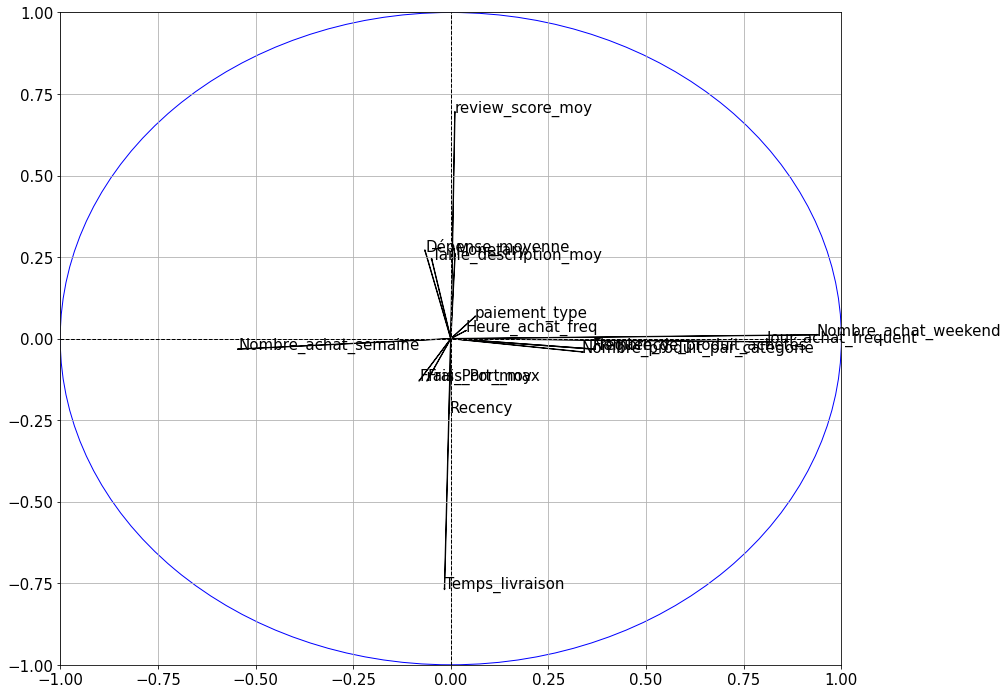

In [106]:
fig, axes = plt.subplots(figsize=(14, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
for j in range(len(features)):
    plt.annotate(features[j], (varfac[j, 2], varfac[j, 3]))
    axes.arrow(0, 0, varfac[j, 2], varfac[j, 3])
# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='black', linestyle='--', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linestyle='--', linewidth=1)
# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.grid()
axes.add_artist(cercle)
plt.show()

(-1.0, 1.0)

(-1.0, 1.0)

Text(0.32121192489958705, 0.02417803666260604, 'Taille_description_moy')

Text(-0.2738937029910127, 0.6489199267987967, 'paiement_type')

Text(-0.004182335854046635, -0.022971344771961617, 'Nombre_achat_weekend')

Text(-0.01667827005743727, 0.018631045535206624, 'Nombre_achat_semaine')

Text(0.3797311720607712, 0.06935806926474056, 'Recency')

Text(0.01942859222203899, -0.050510095755342814, 'Jour_achat_frequent')

Text(-0.09115420342663963, 0.7290948012413844, 'Heure_achat_freq')

Text(-0.4437588248170317, -0.10050803408401777, 'Frais_Port_max')

Text(-0.44112264374568405, -0.10162946957504991, 'Frais_Port_moy')

Text(0.38684159915287075, 0.09541828061727936, 'Dépense_moyenne')

Text(0.3785363132423365, 0.09153811992020523, 'Monetary')

Text(-0.02929162394187762, -0.0012080844930169926, 'Frequency')

Text(0.006543259861638303, 0.004531154149353677, 'Nombre_produit_par_catégorie')

Text(-0.029291623941877582, -0.0012080844930170951, 'Nombre_de_produit_achetés')

Text(0.104931203836251, 0.016088421783700083, 'Temps_livraison')

Text(-0.2986058936976212, -0.1624354847467666, 'review_score_moy')

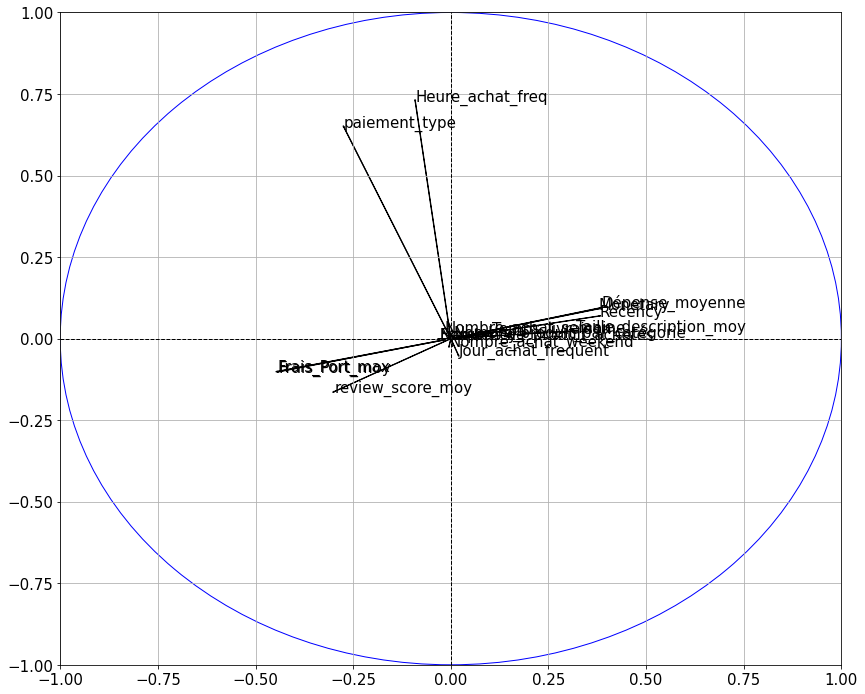

In [107]:
fig, axes = plt.subplots(figsize=(14, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
for j in range(len(features)):
    plt.annotate(features[j], (varfac[j, 4], varfac[j, 5]))
    axes.arrow(0, 0, varfac[j, 4], varfac[j, 5])

# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='black', linestyle='--', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linestyle='--', linewidth=1)
# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.grid()
axes.add_artist(cercle)
plt.show()

(-1.0, 1.0)

(-1.0, 1.0)

Text(-0.38934365949733446, -0.22101146208730213, 'Taille_description_moy')

Text(-0.2611137629217359, 0.6390887054503148, 'paiement_type')

Text(-2.4266461624359436e-05, -0.01814909447847237, 'Nombre_achat_weekend')

Text(0.0021355384595425, 0.003858242733975221, 'Nombre_achat_semaine')

Text(0.7407340531764431, 0.33035911404194734, 'Recency')

Text(-0.012422341484221165, 0.010902109621956011, 'Jour_achat_frequent')

Text(0.2832588632992491, -0.6107579550275543, 'Heure_achat_freq')

Text(0.09809460598257609, -0.01908423217842809, 'Frais_Port_max')

Text(0.09844500344660444, -0.019336889915707697, 'Frais_Port_moy')

Text(0.0004081136341084549, 0.08111987466364842, 'Dépense_moyenne')

Text(0.00031947457349211814, 0.07555821493957382, 'Monetary')

Text(0.0030635139868818, -0.016687485770420868, 'Frequency')

Text(0.022725769603913402, -0.009343387421659508, 'Nombre_produit_par_catégorie')

Text(0.003063513986881772, -0.016687485770421038, 'Nombre_de_produit_achetés')

Text(-0.06120897981671092, -0.042009427478879355, 'Temps_livraison')

Text(0.3633784202931957, 0.029468495248932698, 'review_score_moy')

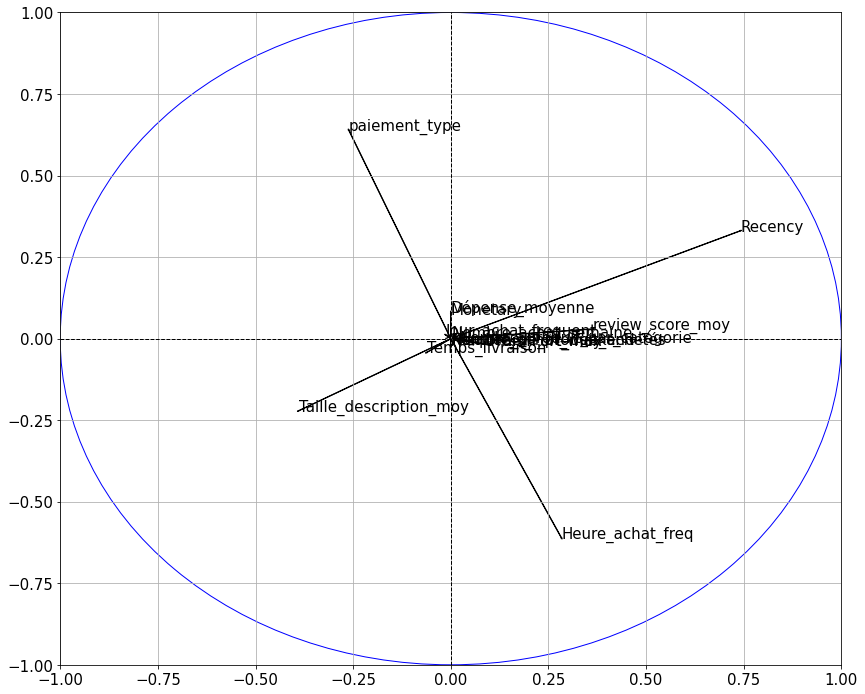

In [108]:
fig, axes = plt.subplots(figsize=(14, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
for j in range(len(features)):
    plt.annotate(features[j], (varfac[j, 6], varfac[j, 7]))
    axes.arrow(0, 0, varfac[j, 6], varfac[j, 7])

# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='black', linestyle='--', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linestyle='--', linewidth=1)
# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.grid()
axes.add_artist(cercle)
plt.show()

(-1.0, 1.0)

(-1.0, 1.0)

Text(-0.7586291215915629, -0.04494075735939784, 'Taille_description_moy')

Text(-0.12420754872518613, 0.0564573638028176, 'paiement_type')

Text(-0.005555555945108394, -0.01699660922637964, 'Nombre_achat_weekend')

Text(-0.014611574736686953, 0.011174625637121327, 'Nombre_achat_semaine')

Text(-0.3373849024800883, -0.1560778364110919, 'Recency')

Text(-0.008778172351371901, 0.021406041753269236, 'Jour_achat_frequent')

Text(0.03182833452686176, 0.0046344812336241836, 'Heure_achat_freq')

Text(-0.1258237270664834, -0.12689735759300474, 'Frais_Port_max')

Text(-0.12590844718978234, -0.12555976786272252, 'Frais_Port_moy')

Text(0.24126274903564338, 0.07753439871487504, 'Dépense_moyenne')

Text(0.2374960082551152, 0.0780613442063347, 'Monetary')

Text(-0.027983526523386686, -0.004675250305491177, 'Frequency')

Text(-0.033351775297755425, -0.022836684921144886, 'Nombre_produit_par_catégorie')

Text(-0.02798352652338672, -0.0046752503054912934, 'Nombre_de_produit_achetés')

Text(-0.10937065836040155, 0.5595867583406084, 'Temps_livraison')

Text(-0.18763525622973753, 0.47151094123198733, 'review_score_moy')

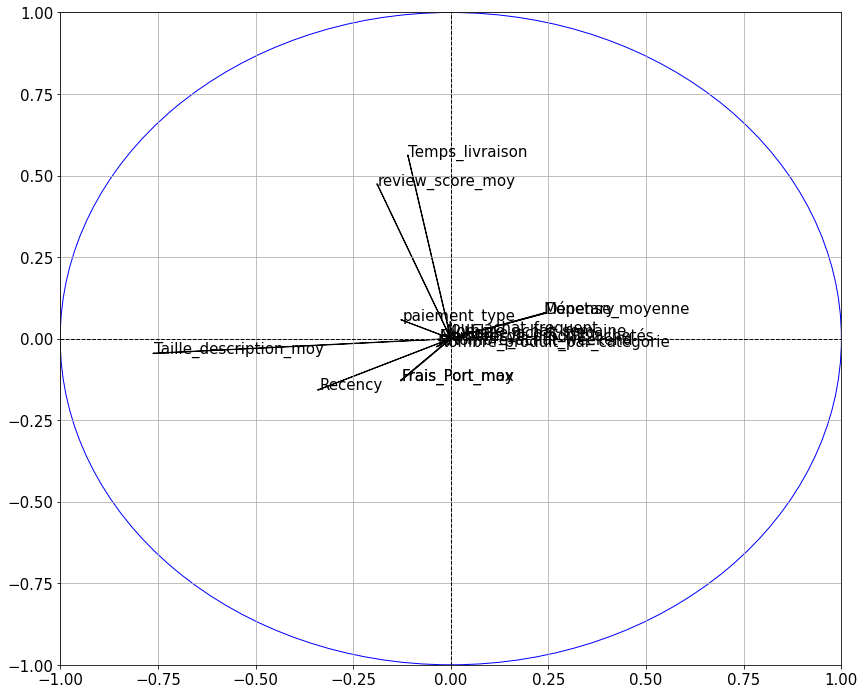

In [119]:
fig, axes = plt.subplots(figsize=(14, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
for j in range(len(features)):
    plt.annotate(features[j], (varfac[j, 8], varfac[j, 9]))
    axes.arrow(0, 0, varfac[j, 8], varfac[j, 9])
# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='black', linestyle='--', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linestyle='--', linewidth=1)
# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.grid()
axes.add_artist(cercle)
plt.show()

In [110]:
var_Principales = pd.DataFrame({'feature':features, 'F1': varfac[:,0], 'F2': varfac[:,1],
                                'F3': varfac[:,2], 'F4': varfac[:,3], 'F5': varfac[:,4], 'F6': varfac[:,5],
                                'F7': varfac[:,6], 'F8': varfac[:,7], 'F9': varfac[:,8], 'F10': varfac[:,9]})
                                                                                                                           
var_Principales

,feature,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,Taille_description_moy,0.097083,0.218155,-0.048709,0.242642,0.321212,0.024178,-0.389344,-0.221011,-0.758629,-0.044941
1,paiement_type,-0.019789,-0.004545,0.061363,0.066906,-0.273894,0.648920,-0.261114,0.639089,-0.124208,0.056457
2,Nombre_achat_weekend,-0.151169,0.171198,0.936260,0.011767,-0.004182,-0.022971,-0.000024,-0.018149,-0.005556,-0.016997
3,Nombre_achat_semaine,0.689316,-0.424889,-0.542343,-0.031961,-0.016678,0.018631,0.002136,0.003858,-0.014612,0.011175
4,Recency,-0.057887,-0.007398,-0.003992,-0.226191,0.379731,0.069358,0.740734,0.330359,-0.337385,-0.156078
5,Jour_achat_frequent,-0.277325,0.226709,0.809264,-0.009873,0.019429,-0.050510,-0.012422,0.010902,-0.008778,0.021406
6,Heure_achat_freq,-0.046301,0.037747,0.036494,0.023175,-0.091154,0.729095,0.283259,-0.610758,0.031828,0.004634
7,Frais_Port_max,0.417678,0.744004,-0.059747,-0.126825,-0.443759,-0.100508,0.098095,-0.019084,-0.125824,-0.126897
8,Frais_Port_moy,0.373136,0.766887,-0.079587,-0.126952,-0.441123,-0.101629,0.098445,-0.019337,-0.125908,-0.125560
9,Dépense_moyenne,0.408470,0.718732,-0.065667,0.268501,0.386842,0.095418,0.000408,0.081120,0.241263,0.077534


ValueError: too many values to unpack (expected 3)

<AxesSubplot:ylabel='feature'>

Text(0.5, 1.0, 'Qualité de représentation des variables ')

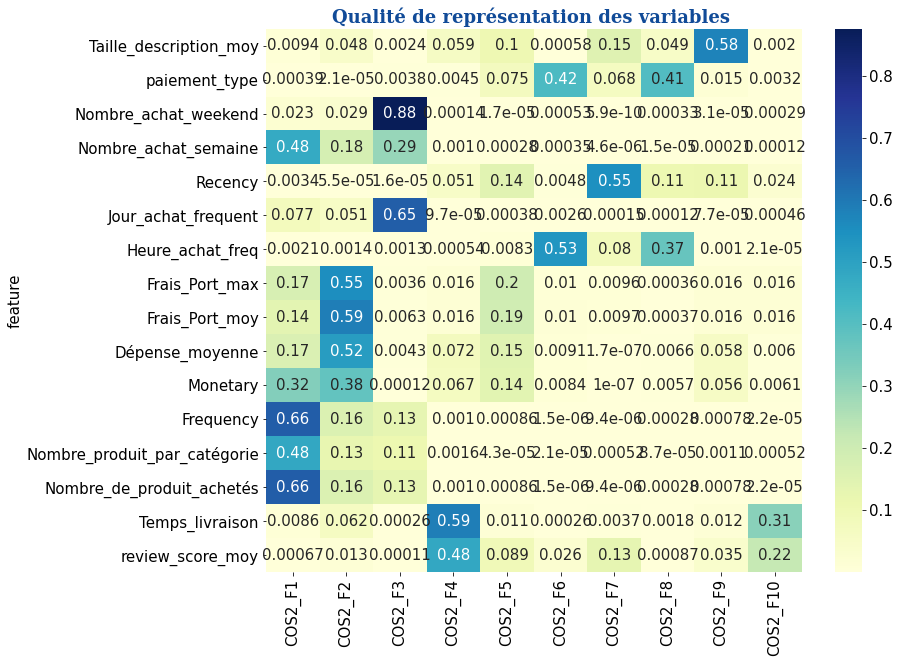

ValueError: too many values to unpack (expected 3)

In [111]:
cos2var = varfac**2
df_cos2var = pd.DataFrame({'feature':features,'COS2_F1':cos2var[:, 0],
                           'COS2_F2':cos2var[:, 1], 'COS2_F3':cos2var[:, 2],
                           'COS2_F4':cos2var[:, 3], 'COS2_F5':cos2var[:, 4],
                           'COS2_F6':cos2var[:, 5],
                           'COS2_F7':cos2var[:, 6], 'COS2_F8':cos2var[:, 7],
                           'COS2_F9':cos2var[:, 8], 'COS2_F10':cos2var[:, 9]}).set_index('feature')
#affichage dans un heatmap seaborn
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df_cos2var, annot=True, cmap="YlGnBu")
plt.title("Qualité de représentation des variables ", fontdict=font_title)
plt.show()

Interprétation des Cercle des Corrélations et du tableau de la projection des variables initiales sur les variables principales :
- On remarque que les variables: 'Nombre_produit_par_catégorie', 'Nombre de produit_achetés', 'Nombre_achat_semaine' sont bien présentées sur 'F1', donc on peut dire que F1 représente le 'nombre d'achat'
- On remarque que les variables: 'frais_port_moy', 'frais_port_max', 'Monetary', 'Dépense_moyenne' sont bien présentées sur 'F2', donc on peut dire que F2 représente la 'valeure d'achat'
- On remarque que les variables: 'Nombre_achat_weekend', 'Jour_achat_frequent' sont bien présentées sur 'F3', donc on peut dire que F3 représente le 'temps d'achat'
- On remarque que les variables: 'review_score_moy', 'Temps_livraison' sont bien présentées sur 'F4' et elles sont opposées, donc on peut dire que F4 représente la 'satisfaction du client'
- On remarque que  F7 représente la 'Recency'    



In [112]:
data_pca = pd.DataFrame(composantes, index=data.index,
                        columns=["F" + str(i + 1) for i in range(n)])
data_pca

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,-0.482703,-0.960867,-0.742426,0.444855,0.062577,-0.780432,0.442829,1.278040,-0.238484,-0.028308
1,-0.316261,-0.554709,-0.840897,-0.355513,0.502263,-1.539307,1.445758,-0.127414,-0.331981,0.251937
2,-0.364324,-0.282605,-0.227474,-0.438794,-0.441354,-0.585445,-0.950802,0.432604,0.316888,0.514220
3,-0.369137,-0.801019,-0.990808,0.330407,-0.141181,0.579449,1.211230,0.186322,-0.322544,-0.067125
4,-0.598566,-0.747507,-0.415333,0.033912,0.002144,0.971353,1.246255,-0.190670,-0.310871,0.406849
...,...,...,...,...,...,...,...,...,...,...
95119,0.197401,-0.030995,-1.348390,-0.337067,-1.047060,0.304655,-1.003867,-0.409575,0.755867,-0.680912
95120,0.575721,0.914680,-0.672014,0.551483,0.936054,-1.737543,-1.015510,-0.814360,0.297048,1.412544
95121,-0.118251,0.068826,-0.341838,0.402860,1.475408,-1.461076,0.496255,-0.213586,-0.484524,-0.701144
95122,21.420771,34.092618,-3.113874,9.880841,14.023231,3.253696,0.137130,2.093170,12.084887,1.697765


## Enregistrement du Nouveau jeu de données dans un fichier csv

On va enregistrer nos deux datasets; la première est la représentation de nos observations sur les axes principals, le deuxième est le jeu nettoyé afin de pouvoir les utiliser dans l'exersice de la segmentation(Modélisation) sur un autre notebook.

In [113]:
path = r"\Users\Utilisateur\Downloads\data_pca.csv"
data_pca.to_csv(path, index=False)
path2 = r"\Users\Utilisateur\Downloads\data_olist.csv"
data['date'] = order.order_purchase_timestamp
data.to_csv(path2, index=False)